# Analysis of relative mRNA from Hippocampal Primary Neuron Cultures
Analysis by Tim Monko starting on March 17, 2023
The purpose of this analysis is to extend upon the previously conducted t-tests by Tommy et al. on 11, 18, and 21 DIV primary hippocampal neurons. 

### Experimental Model
1. Primary hippocampal cultures were harvested from E16.5 wildtype mouse brains. 
2. Cultures were initially placed in plating media (includes Glutamate), then after 4 hours transitioned to Glia Conditioned Neurobasal/B27 media
3. At 3DIV, media is replaced (Control condition / FeS, iron sufficient) and additionally dosed with the iron chelator DFO (DFO condition/ FeD, iron deficient)
4. At 14DIV, some DFO cultures were repleted with iron by removing DFO containing media (DFOR condition / FeR, FeD + iron repletion)

### Data acquired via qPCR
1. qPCR performed at 11, 18, or 21 DIV -- approximately corresponding to 1) the beginning of peak dendritic growth and synapse formation, 2) the end, or 3) mature neurons, respectively.
2. 

### Gene Info
Genes can be roughly grouped by their primary function in the following 3 ways:

**Neurodevelopment**

1. Nrgn (Neurogranin): glutamatergic pyramidal neurons, a Ca2+/calmodulin binding protein involved in synapses and associated with diseases with synaptic dysfunction
2. Pvalb (Parvalbumin): GABAergic inhibitory interneurons (fast-spiking, basket, axo-axonic and bistratified cells in HPC), a calcium signaling protein
3. Klf9 (KLF Tf 9/ Kruppel Like Factor 9): neuronal cell differentiation, KLF9 expression increases over time, especially throughout early and mid postnatal development, peaking at P30. *responsive to T3* https://pubmed.ncbi.nlm.nih.gov/19359381/ 

**TH related**

1. Crym (mu-crystallin homolog / NADP-regulated thyroid-hormone-binding-protein / THBP): TH binding protein
2. Dio2 (type II iodothyronine deiodinase): activates TH by converting T4 to bioactive T3
3. Hr (Hairless): transcriptional co-repressor for TH, interacts with HDACs
4. Slc16a2 (solute carrier family 16 member 2): TH transporter
5. Slco1c1 (solute carrier organic anion transporter family member 1C1): T4 transporter

**Iron related**

1. Tfr1 (transferrin receptor 1): binds extracellular Transferrin, thus importing iron via endocytosis. Upregulated if low labile iron (via disinhibition of IRP1/2) jelolo bvcVCXVXZ                                         


# To-Do

1. refactor PCA so that I fully understand each vector added to ML, and use language normally found: feat_cols, X, y, etc. This will help translate the date in the future
2. Use ColumnIterater to impute dfs
3. update PCA plots to use plt themes of interest- confirm if biplots are best visualization
4. work on interpretation of eigen values
5. work on saving seaborn plots

for other things in the lab:
1. export image scenes from files via for loop
2. max project saving from napari
3. n2v for max projected images
4. labeling, otherwise 
5. it is likely best if I  learn to export image layers directly from napari

## Open File
* Get file from online dataset using pandas and the sheet url

In [51]:
# Open File
import pandas as pd
import seaborn.objects as so

sheet_url = 'https://docs.google.com/spreadsheets/d/19h-r3Yt_8hF7_XPX3eaNRKUd1TwLMINUvsafSTVhLV0/edit#gid=0'
sheet_name = 'Sheet1'

sheet_id = (
    sheet_url
    .replace('/d/', '*')
    .replace('/edit', '*')
    .split('*')
)

url = f'https://docs.google.com/spreadsheets/d/{sheet_id[1]}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

raw_data = pd.read_csv(url)

raw_data.head()

div   tx  sample      Tfr1   Slc16a2   Slco1c1      Crym     Pvalb  \
0   11  ctl       1  0.887615  1.014553       NaN  1.214971  1.088394   
1   11  ctl       5  1.019602  0.868310       NaN  0.812623  0.900615   
2   11  ctl       9  1.092783  1.117137       NaN  0.972406  1.010990   
3   11  ctl      59  0.986020  0.853487  0.831944  1.195966  0.912644   
4   11  ctl      60  0.901056  1.093988       NaN  1.031685  1.026778   

       Klf9        Hr      Nrgn      Dio2  
0  0.910328  0.867883  0.857594  0.735769  
1  0.968926  0.760791  1.034093  1.077228  
2  1.120746  1.371326  1.108313  1.187003  
3  0.954004  0.949874  1.024060  0.958570  
4  1.073310  1.169432  0.996057  0.913170

## Tidy the `raw_data`, convert to long form `data`
* Declare indexing columns to appropriate data types, isntead of pandas default
* Melt `raw_data` to long form `data` by using genes as variables. Set a multi-index.
* Create the `indexing` function to easily parse the multi-index data in different ways.

In [54]:
# Convert indexing columns to appropriate data types. With sample as str because it is not useful as an int
raw_data['div'] = raw_data['div'].astype('str')
raw_data['tx'] = raw_data['tx'].astype('str')
raw_data['sample'] = raw_data['sample'].astype('str')

# Tidy data
data = (raw_data
        .melt(id_vars=['div','tx','sample'],
          var_name='gene',
          value_name='mrna'
          )
        .set_index(['div','tx','sample','gene'])
)

# Place here to update indexing arguments relative to index set above
def indexing(
        data = data,
        div = slice(None), 
        tx = slice(None), 
        sample = slice(None), 
        gene = slice(None)
        ):
    """Parse multi-indexed pandas dataframe
    Not passing an argument is equivalent to selecting with : by using slice(None)
    Passing a list (even for a list of length 1) will keep the index, so this is encouraged. 
    Passing a string will drop the index column, but select it.
    """
    idx = pd.IndexSlice[div,tx,sample,gene]
    return data.loc[idx]

## Descriptive Statistics grouped by DIV, Tx, and gene
Uses the custom `indexing` function to tidy the dataset and then publish a small descriptive table. 

Not particularly useful to use these descriptive statistics most of the time, but provides a unique perspective if needed. 

In [55]:
desc_data = indexing(
    data = data,                  
    div = slice(None),
    tx = slice(None),
    sample = slice(None),
    gene = ['Tfr1']
)

(desc_data
 .groupby(['gene','div','tx'])
 .describe()
)

mrna                                                    \
              count      mean       std       min       25%       50%   
gene div tx                                                             
Tfr1 11  ctl   12.0  1.000000  0.058579  0.887615  0.985671  1.008051   
         dfo   12.0  1.745206  0.496947  1.354731  1.427663  1.577541   
     18  ctl   13.0  1.000000  0.066228  0.897171  0.950762  0.986297   
         dfo   13.0  2.379974  0.423480  1.583871  2.375793  2.459576   
     21  ctl   20.0  1.000000  0.205056  0.627014  0.927915  0.977124   
         dfo   16.0  1.944312  0.778389  1.131943  1.374130  1.489329   
         dfor  15.0  1.055788  0.224570  0.705207  0.892164  1.026787   

                                   
                    75%       max  
gene div tx                        
Tfr1 11  ctl   1.023462  1.092783  
         dfo   1.882112  3.137660  
     18  ctl   1.045275  1.123819  
         dfo   2.689531  2.829218  
     21  ctl   1.040953  1.485813  
         dfo   2.492311  3.238250  
         dfor  1.205021  1.512223

# Plotting with Seaborn Objects
This initializes plotting functions, and then creates 2 different dicts of `rcparams` to be used with Seaborn objects `so.theme`

In [56]:
from seaborn import axes_style
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib    

# Dict of theme parmams:: -- to inspect the themes of seaborn, and thus borrow the rcparams:
# sns.axes_style('ticks')
# Dict of context/plotting size::
# sns.plotting_context('poster')
# https://github.com/mwaskom/seaborn/blob/master/seaborn/rcmod.py#L14

poster_dict = {
    'xtick.bottom':True,
    'xtick.direction':'out',
    'xtick.color':'0.15',
    'ytick.left':True,
    'ytick.direction':'out',
    'ytick.color':'.15',      
    'axes.grid':True,
    'axes.edgecolor':'0.15',
    'axes.spines.right':False,
    'axes.spines.top': False,
}
ticks_dict = {
    **axes_style("ticks"),
    'axes.spines.right':False,
    'axes.spines.top':False,
}

## Univariate Objects Plots
Currently plotting with seaborn objects has some limitations. But as it improves in the future, I suspect easy to understand and beautiful plots will be easier to create

This block defines the `univariate_plot` function

In [57]:
def univariate_plot(
        data=None,
        theme=poster_dict,
        context='talk',
        tick_list=[0.1,0.5,0.8,1,1.2,1.5,2,3,4],
        title=None,
        width=8,
        height=4,
):

    p = (
        so.Plot(
            data = data, 
            x='gene', 
            y='mrna', 
            color='tx',
        )
        .facet(row='div', col='gene')
        .share(x=False, y=False)
        # .add(so.Dot(pointsize=10,marker='s'), so.Agg(), 
        #     so.Dodge(empty='drop'), so.Shift(x=0.04)
        # )
        .add(so.Dash(alpha=0.8),so.Agg(),
            so.Dodge(empty='drop'))
        .add(so.Range(alpha=1), so.Est(errorbar='sd'), 
            so.Dodge(empty='drop'), so.Shift(x=0.04)
        )
        .add(so.Dots(pointsize=7), 
            so.Dodge(empty='drop'), so.Jitter(), so.Shift(x=-0.04)
        )

        .scale(
            #y='log',
            y=so.Continuous(trans='log').tick(at=tick_list).label(base=None,like="{x:.1f}"),
        )
        .label(
            y="mRNA rel. to avg. ctl",
            x="",
            title=title,
        )
        .layout(size=(width,height))
        .theme(theme)
        .theme(sns.plotting_context(context)) # default is 'notebook', others are 'paper','talk',and 'poster'
    )
    return p

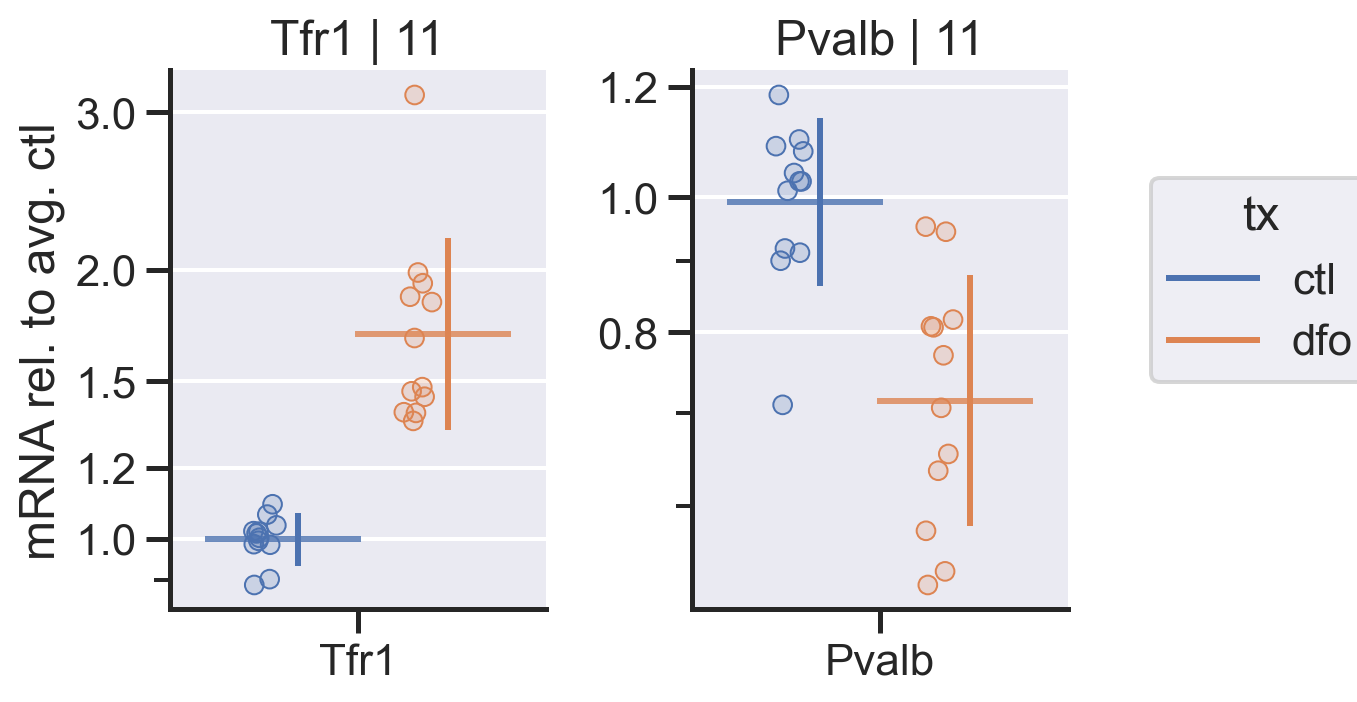

In [58]:
plot_data = indexing(
    data = data,                  
    div = ['11'],
    gene = ['Tfr1','Pvalb']
    ).reset_index()

univariate_plot(
    data=plot_data,
    title=None,
    width=6,
    height=4
)

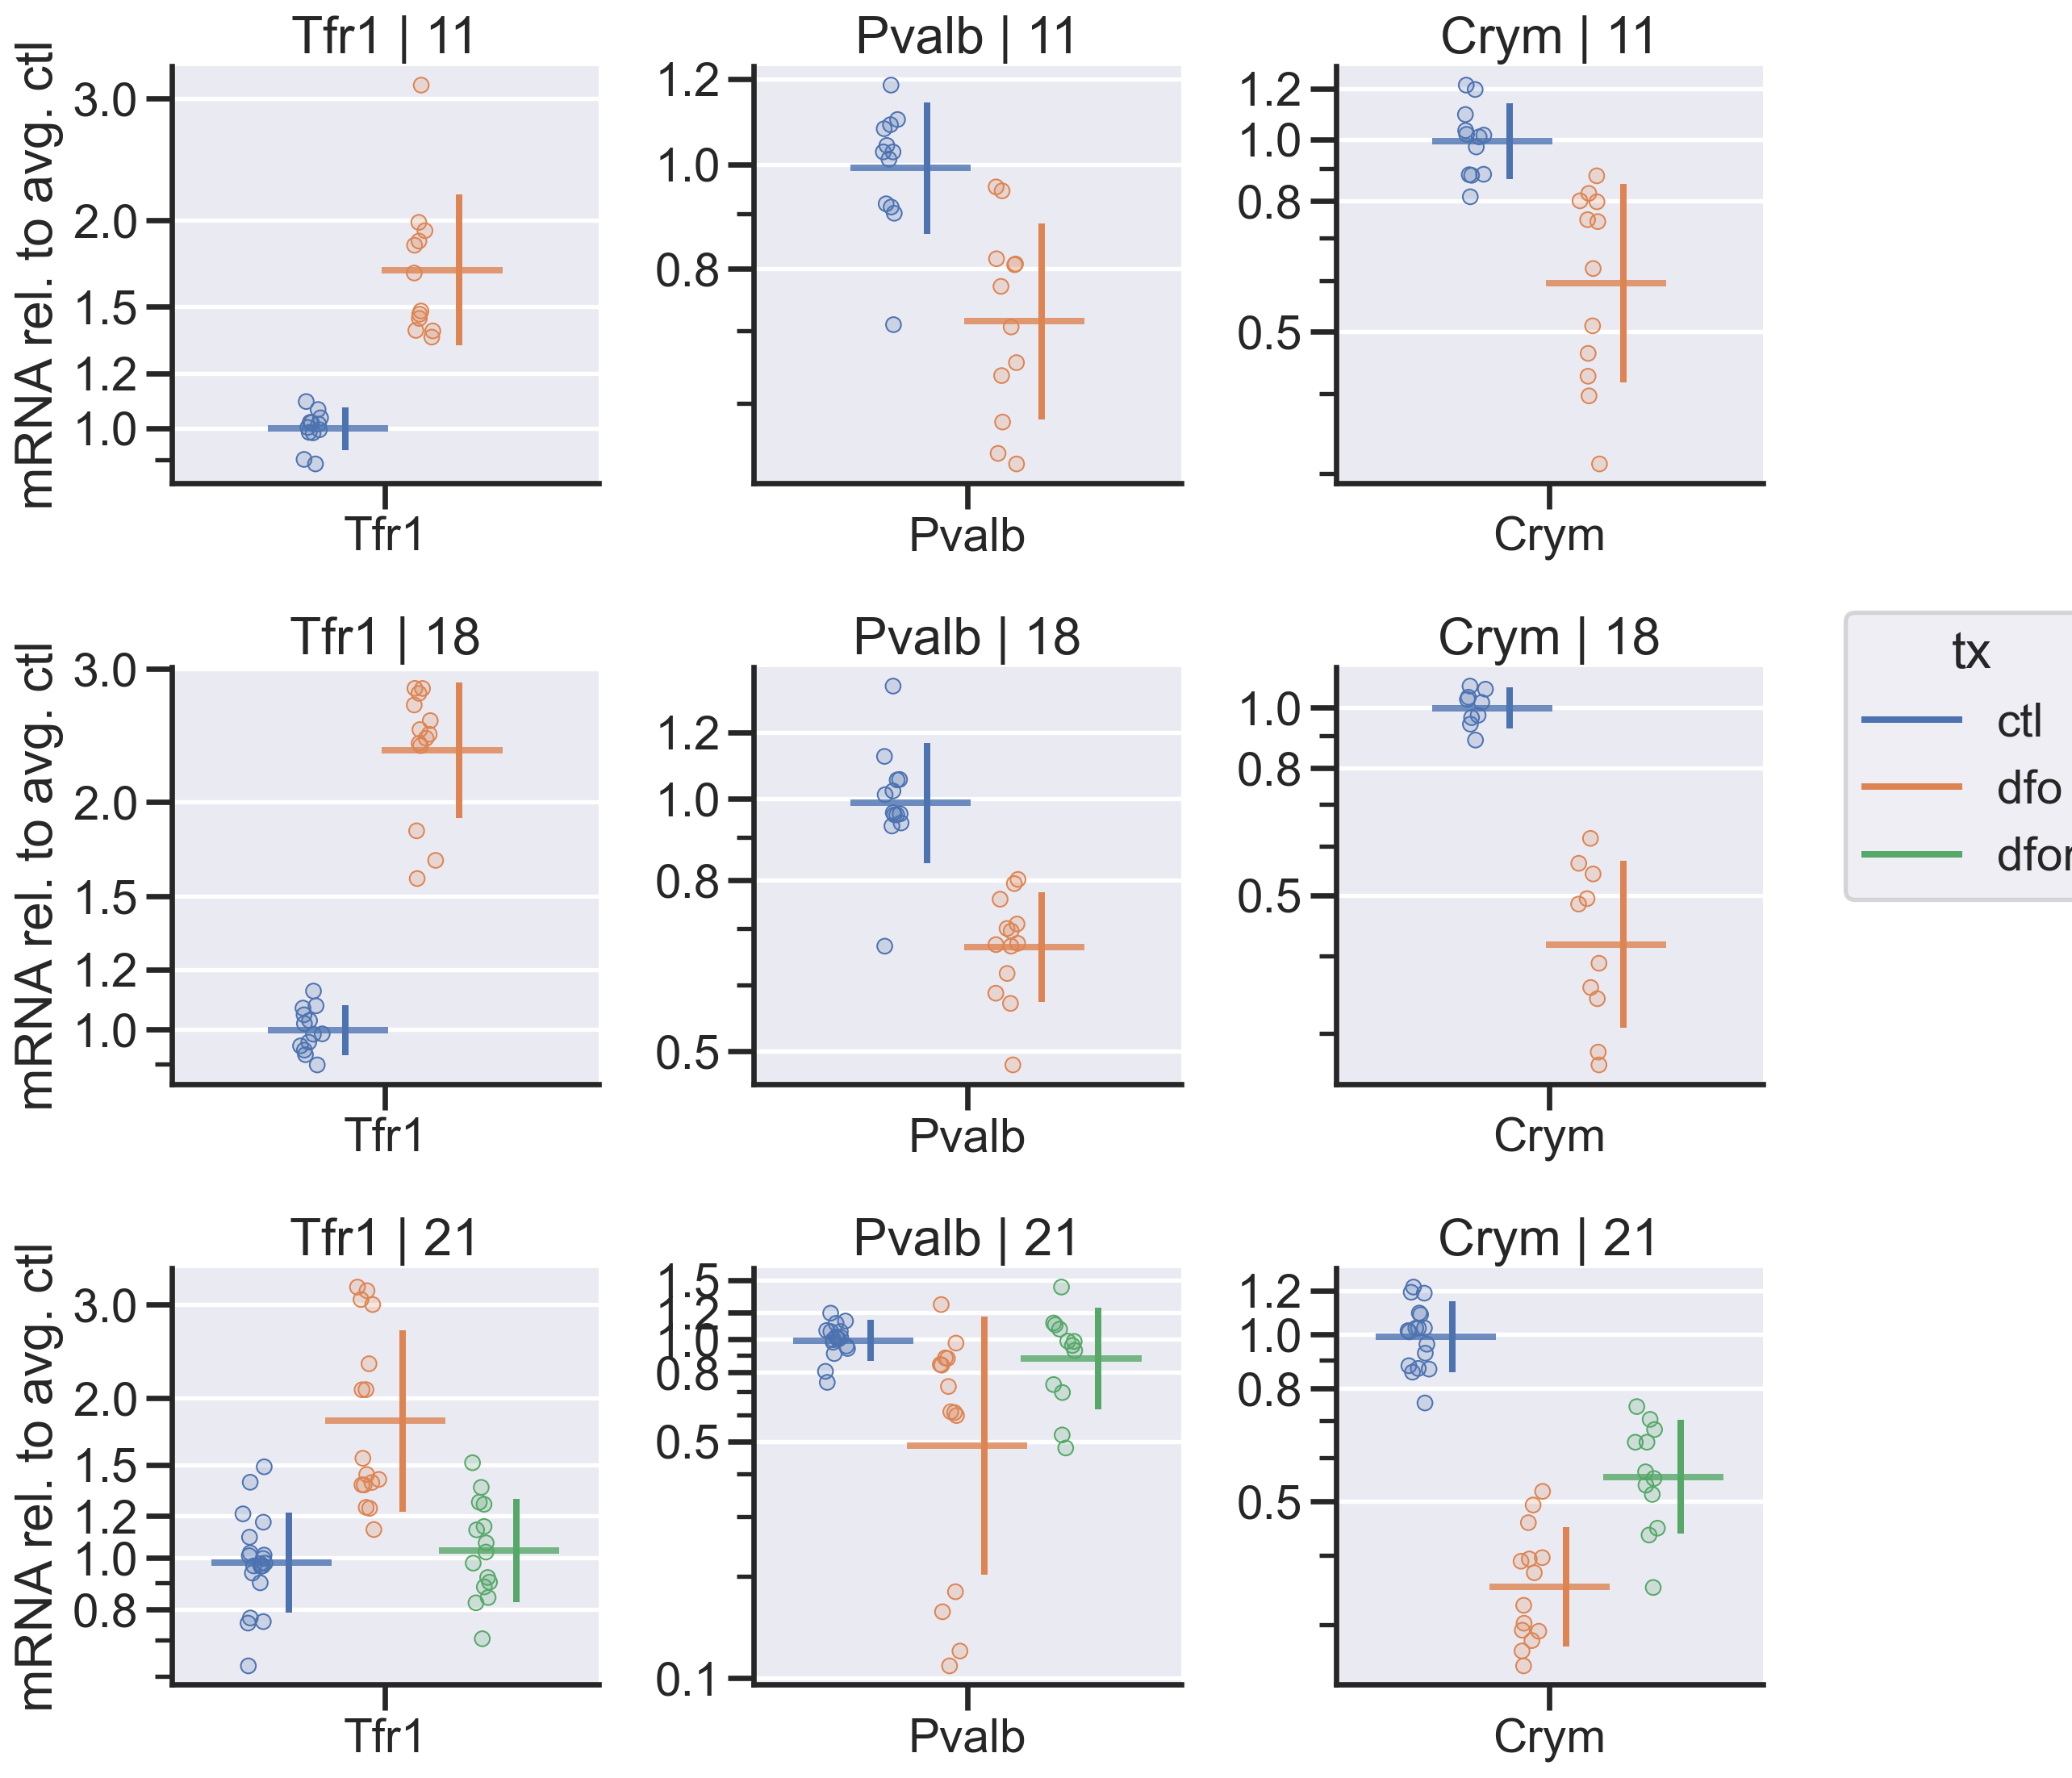

In [7]:
plot_data = indexing(
    data = data,                  
    div = ['11','18','21'],
    gene = ['Tfr1','Pvalb','Crym'],
    ).reset_index()

univariate_plot(
    data=plot_data,
    title=None,
    width=4*3,
    height=4*3,
    theme=poster_dict,
    context='poster'
)

# Correlelogram

* Create `wide_data` by just setting a multi-index for `raw_data`
* Create `wide_indexing` for filtering multi-index of wide data

In [60]:
wide_data = (
    raw_data
    .set_index(['div','tx','sample'])
)
wide_data.head()

def wide_indexing(
        data = wide_data,
        div = slice(None), 
        tx = slice(None), 
        sample = slice(None), 
        ):
    """Parse multi-indexed pandas dataframe
    Not passing an argument is equivalent to selecting with : by using slice(None)
    Passing a list (even for a list of length 1) will keep the index, so this is encouraged. 
    Passing a string will drop the index column, but select it.
    """
    idx = pd.IndexSlice[div,tx,sample]
    return data.loc[idx]

Use the pair plot to create a correlelogram for all filtered data. Using `indexing` to filter for certain features. Does not group by DIV, so would be best to just choose one specific DIV with indexing. 

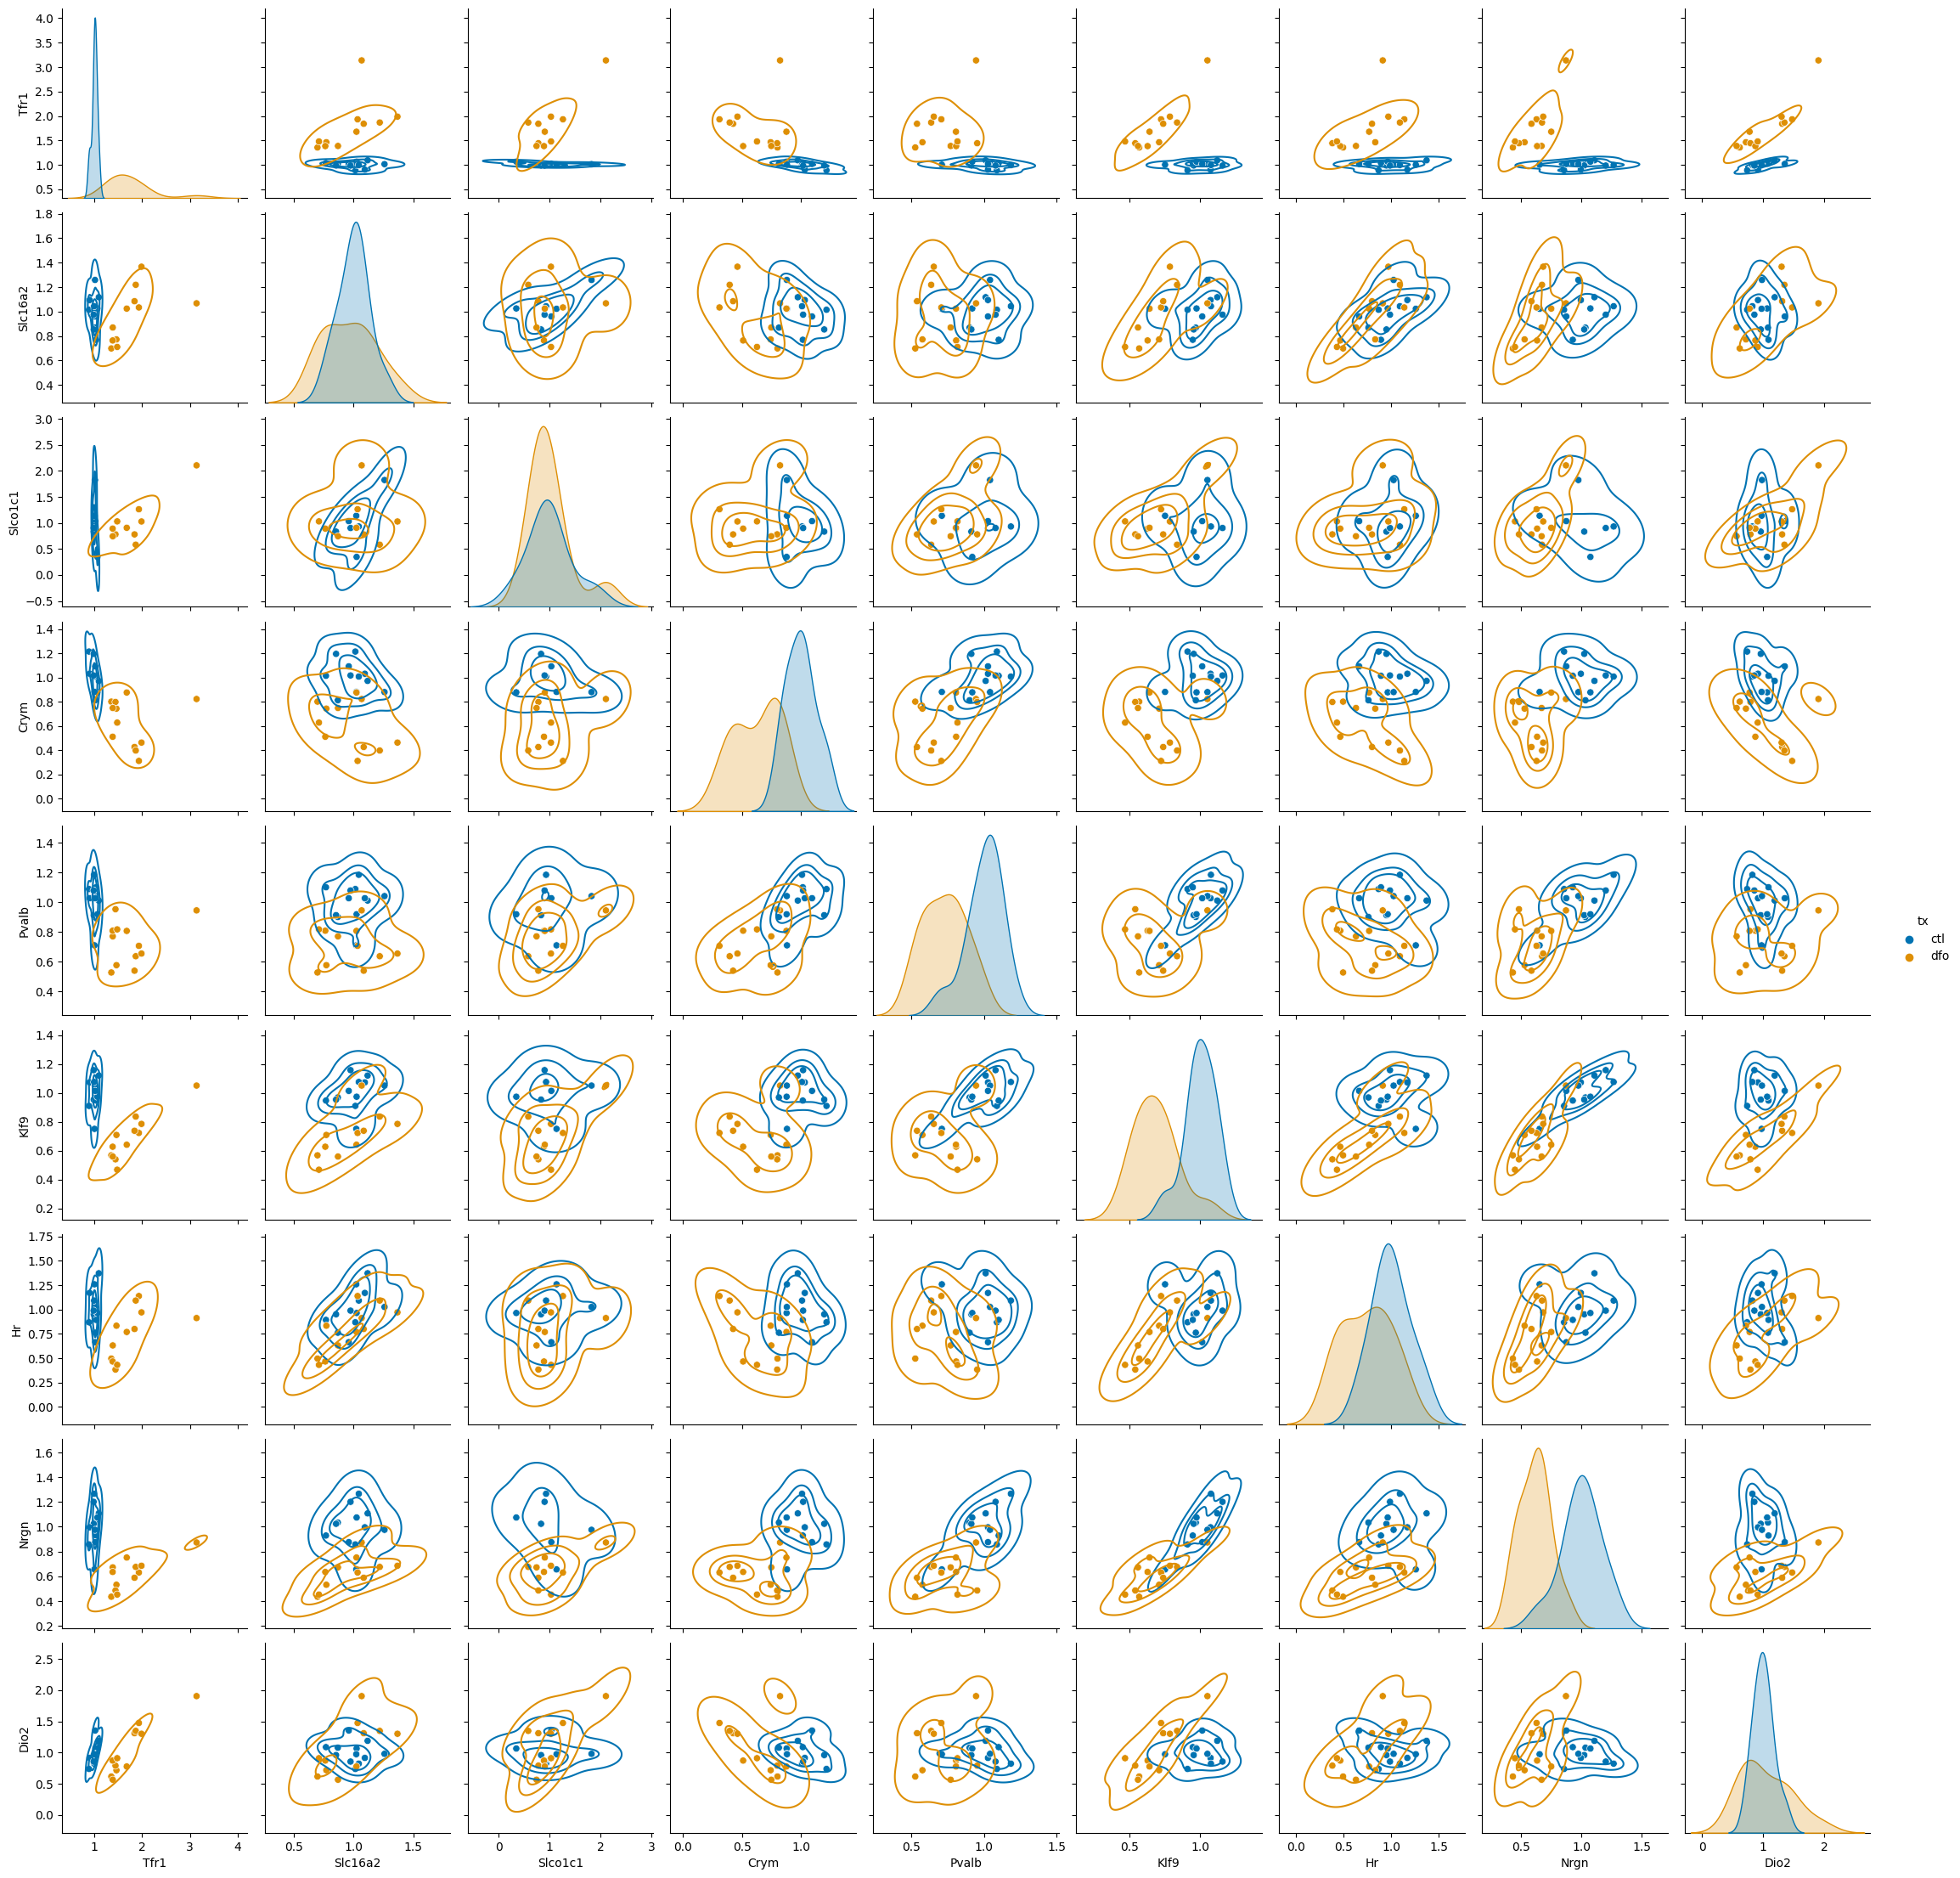

In [61]:
corr_data = wide_indexing(
    data= wide_data,
    div=['11'],
    tx = slice(None),
    sample = slice(None),
    )

g = sns.pairplot(data=corr_data.reset_index(),
             hue='tx',
             dropna=True,
             corner=False,
             palette='colorblind'
             )
g.map_offdiag(sns.kdeplot, levels =4, palette='pastel')

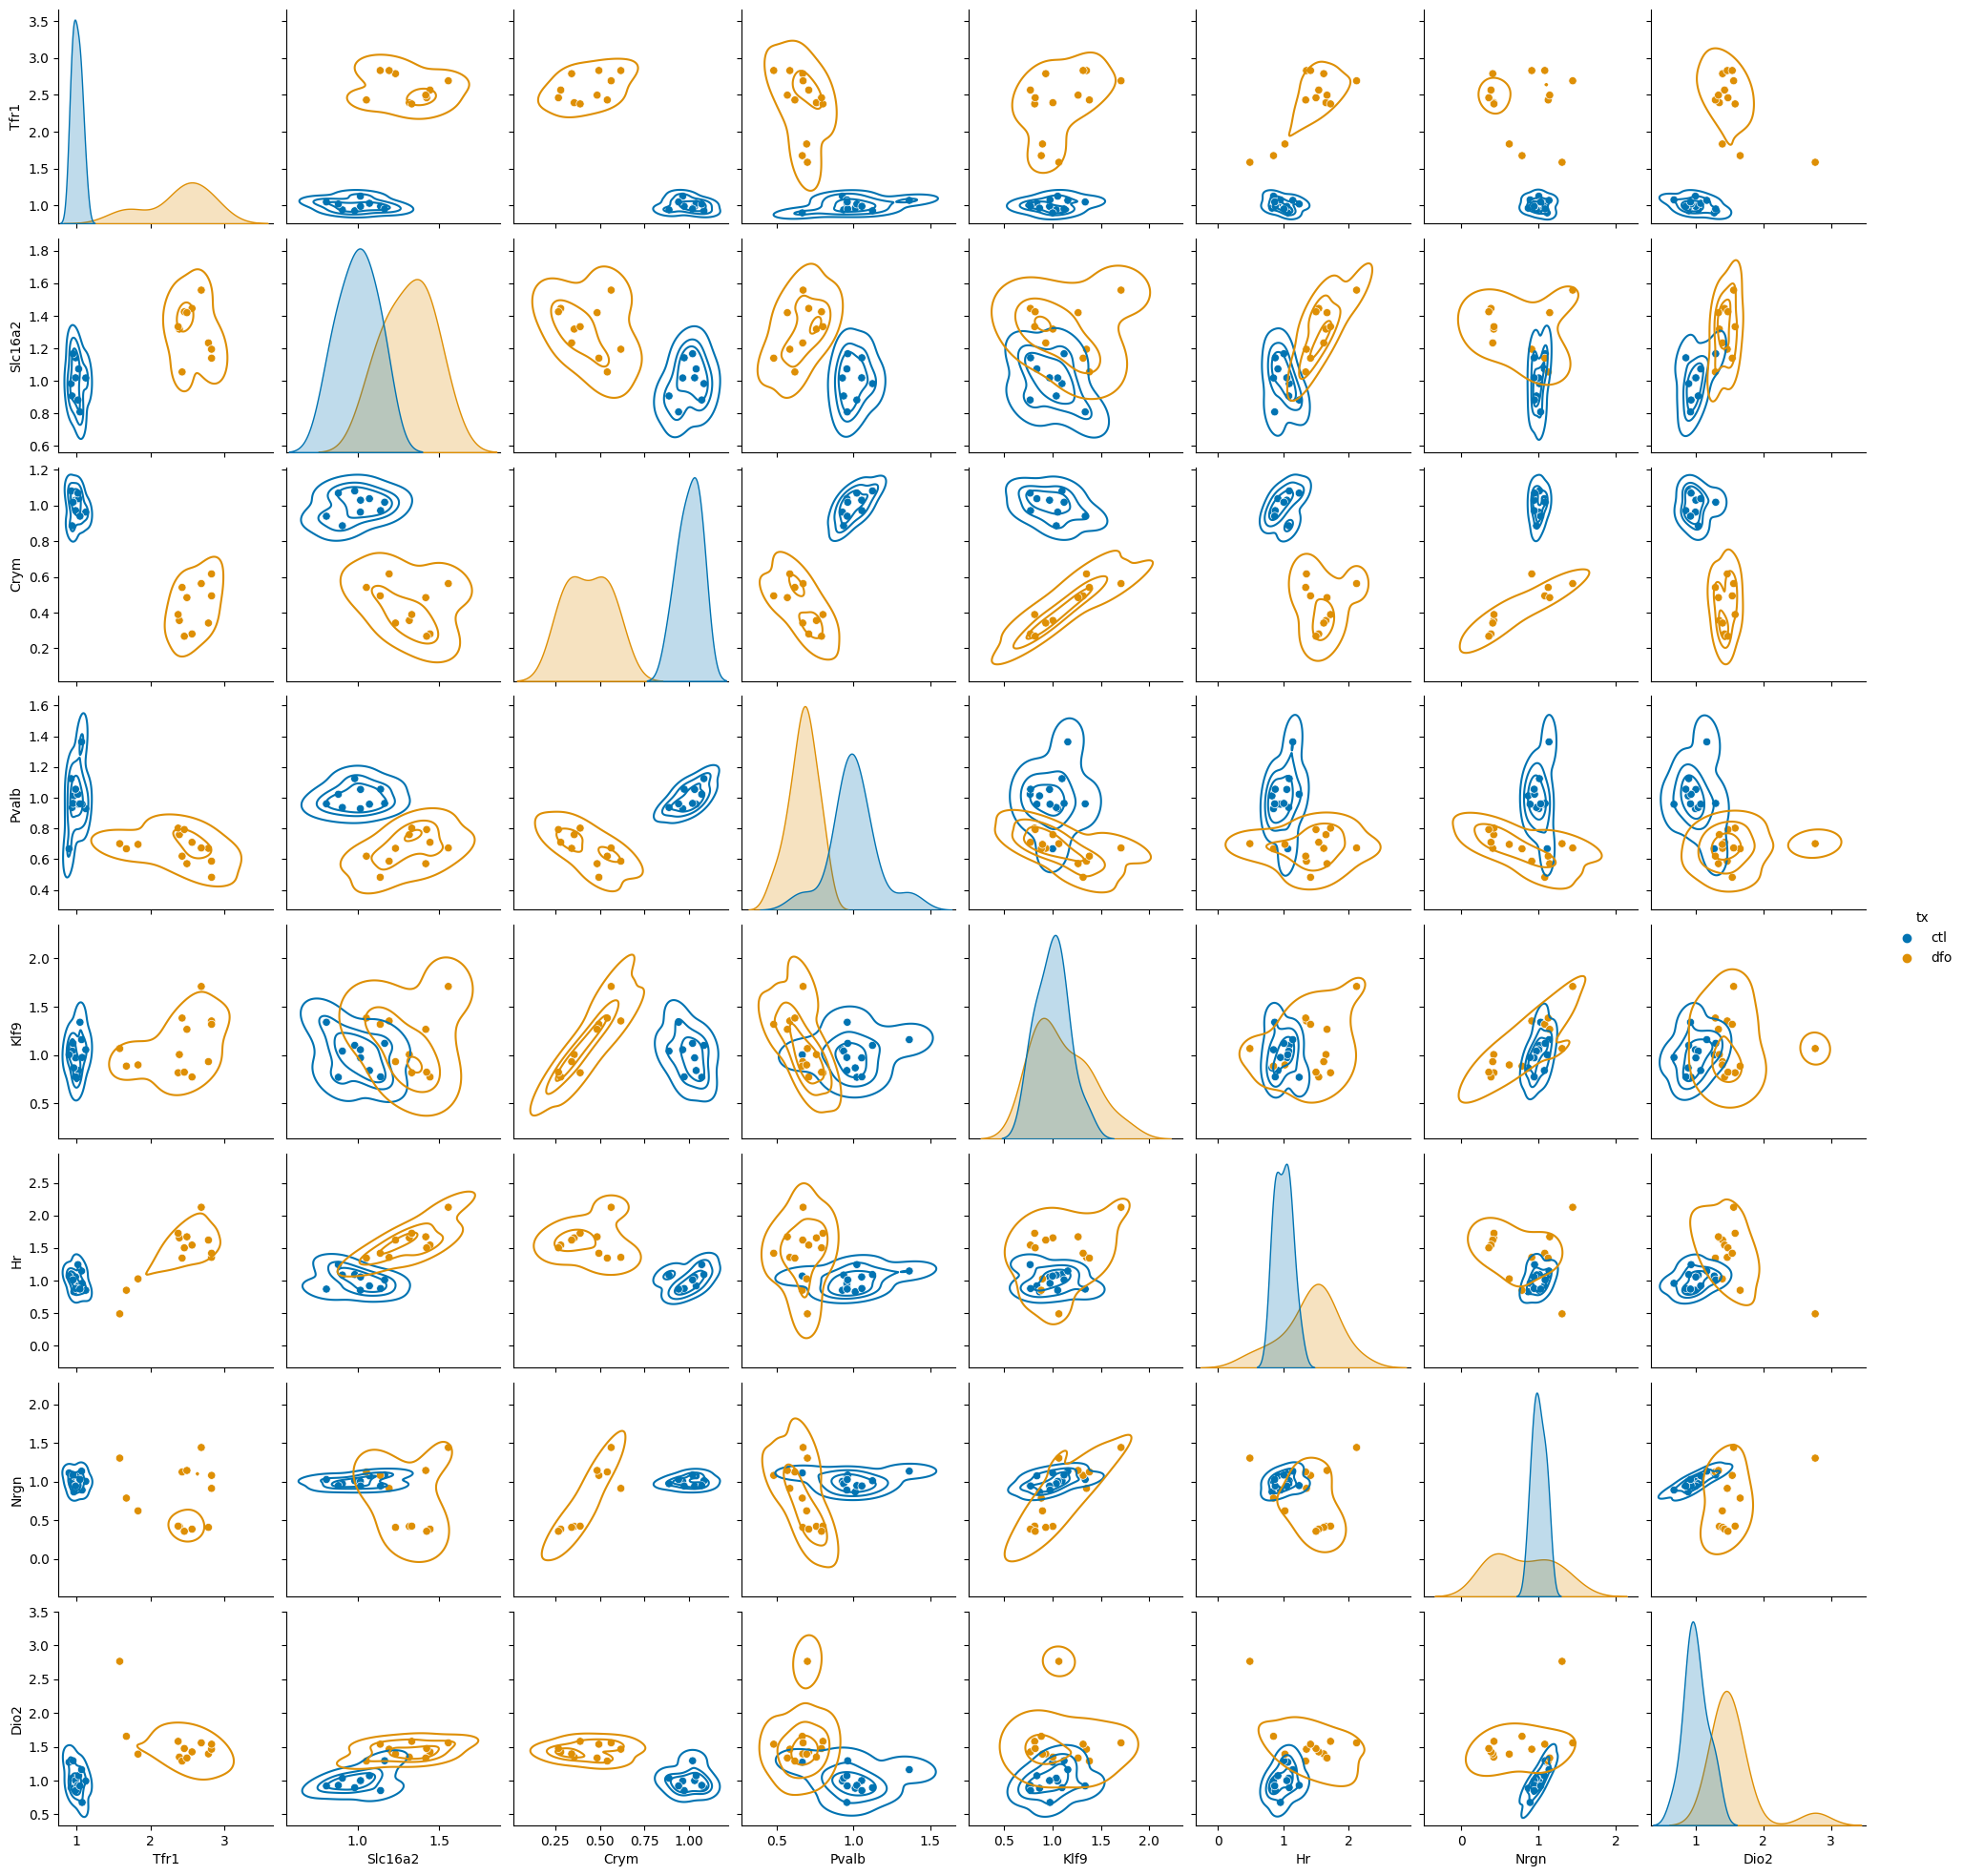

In [62]:
corr_data = wide_indexing(
    data= wide_data,
    div=['18'],
    tx = slice(None),
    sample = slice(None),
    )

g = sns.pairplot(data=corr_data.drop('Slco1c1',axis=1).reset_index(),
             hue='tx',
             dropna=True,
             corner=False,
             palette='colorblind'
             )
g.map_offdiag(sns.kdeplot, levels =4, palette='pastel')

c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\timmo\mambaforge\envs\bastian-lab\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\timmo\mambaforge\envs\bastian-l

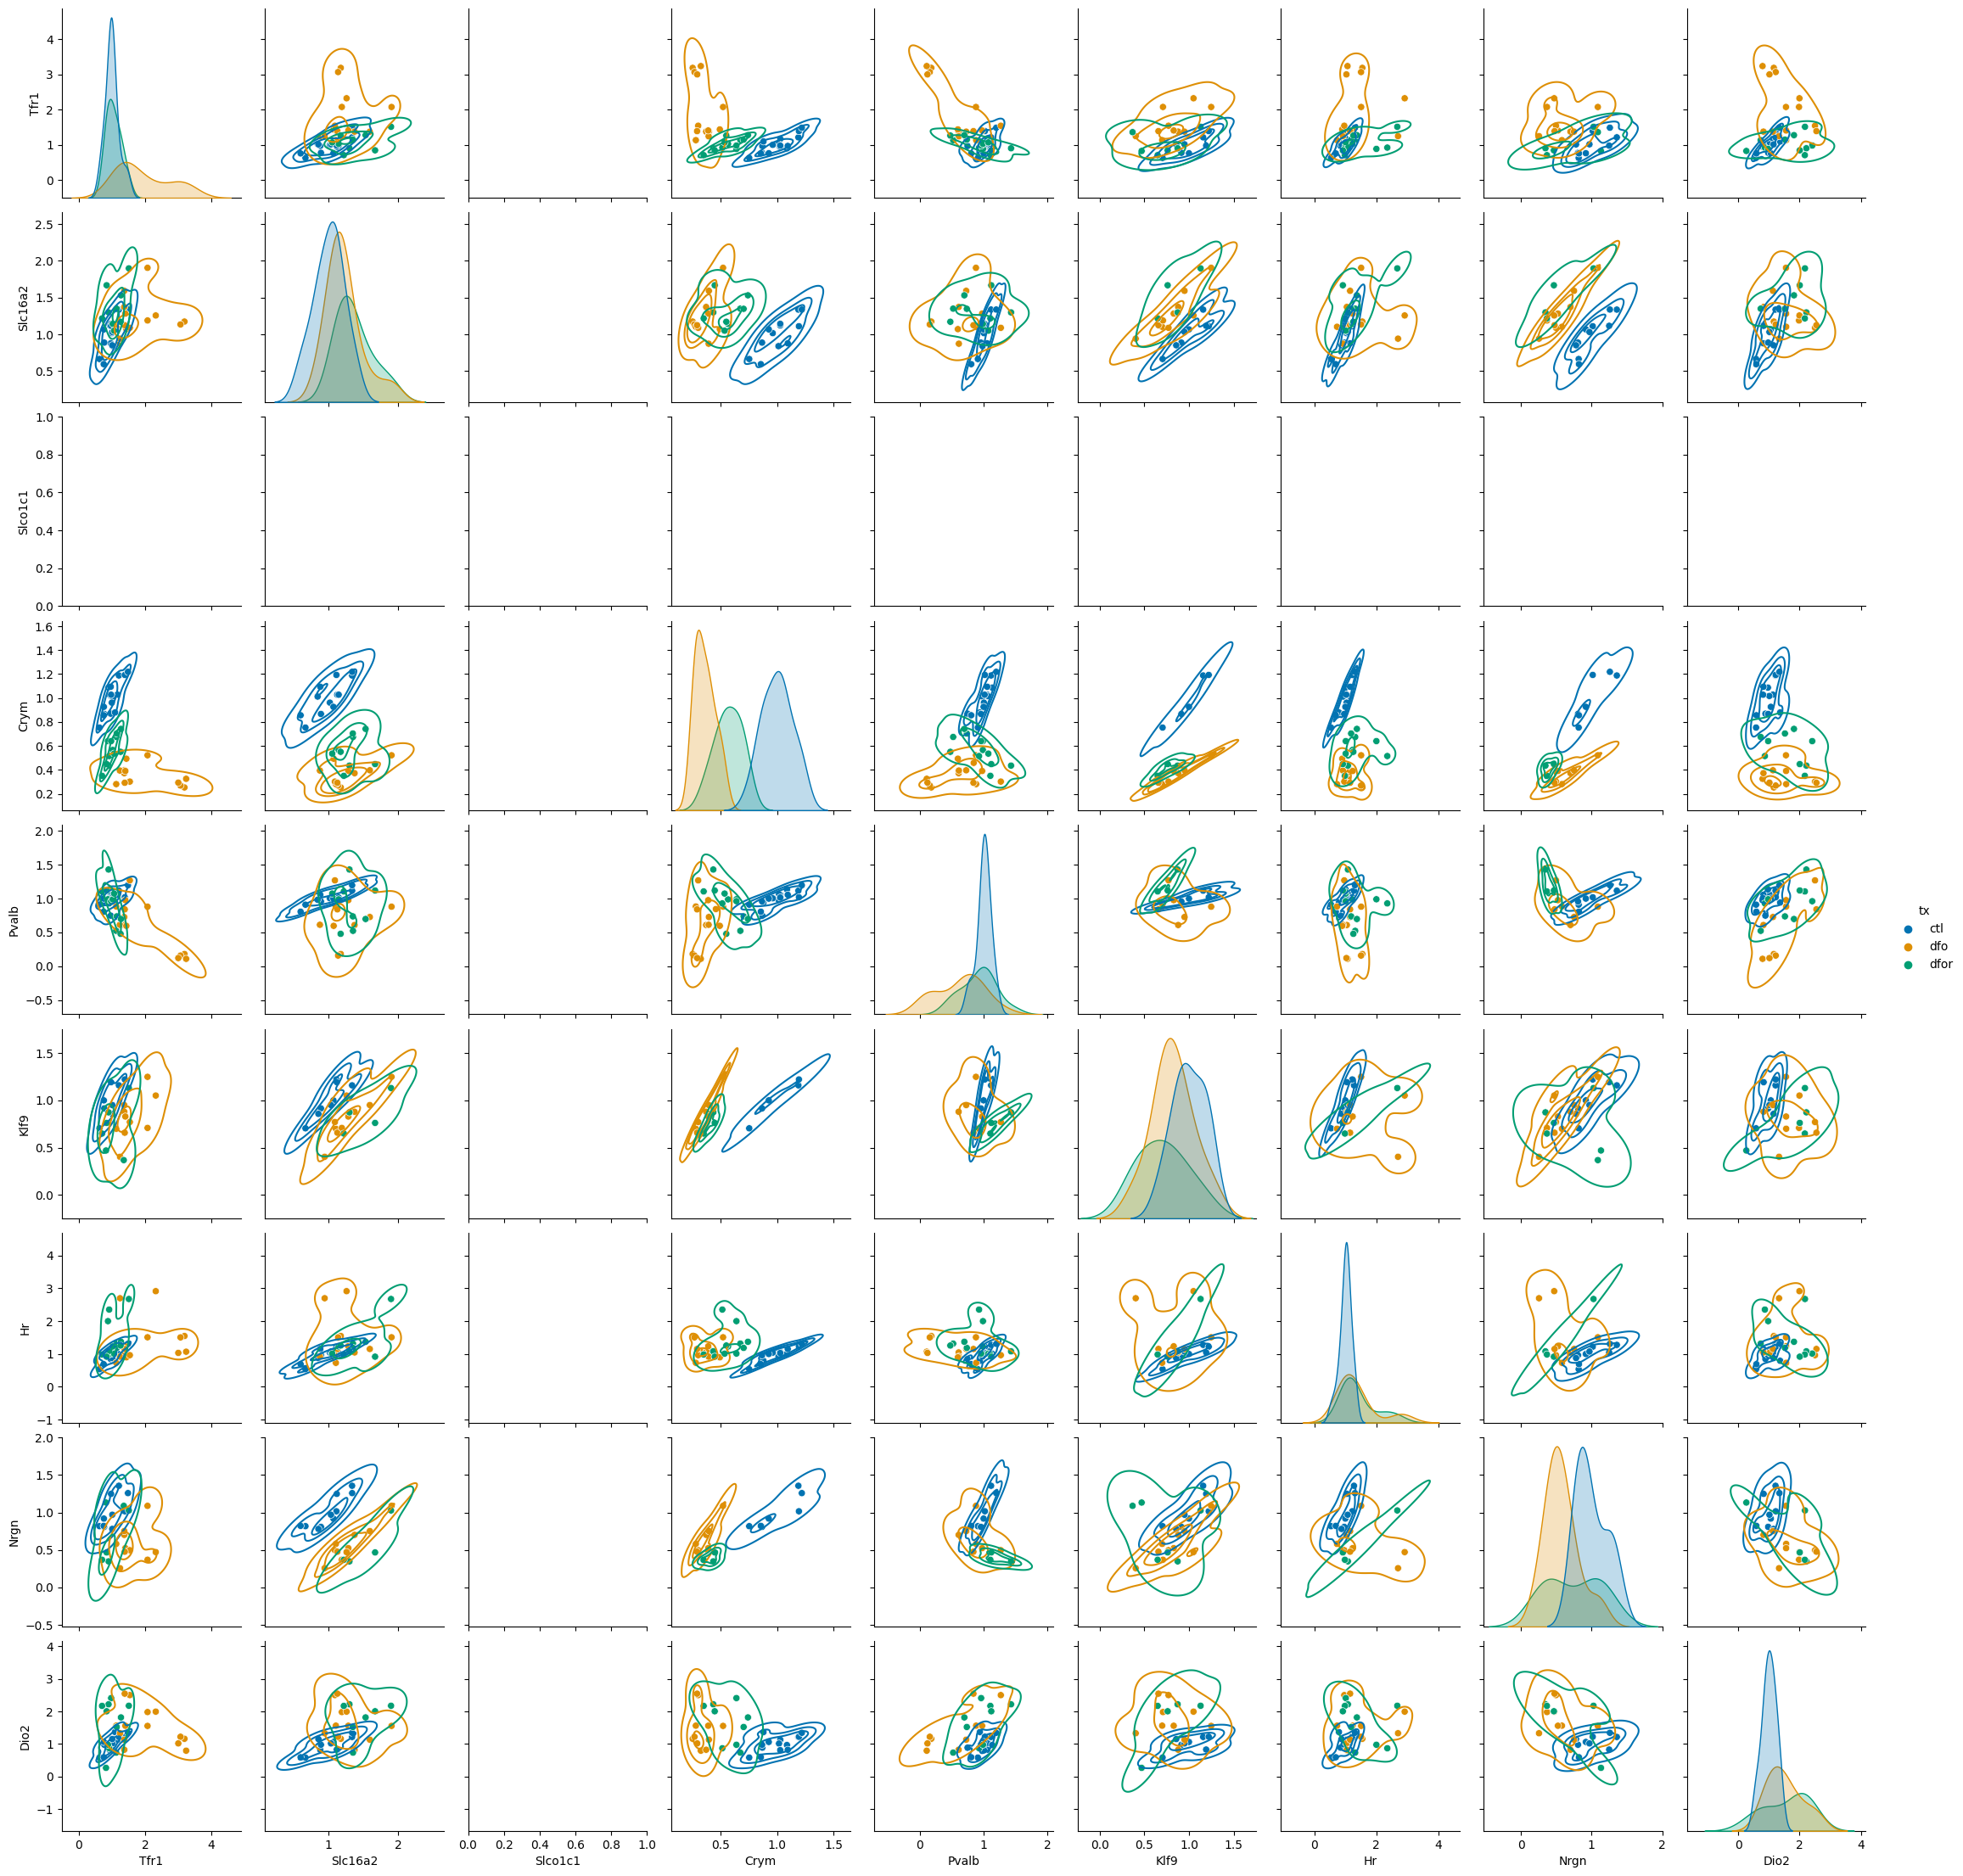

In [63]:
corr_data = wide_indexing(
    data= wide_data,
    div=['21'],
    tx = slice(None),
    sample = slice(None),
    )

g = sns.pairplot(data=corr_data.reset_index(),
             hue='tx',
             dropna=True,
             corner=False,
             palette='colorblind'
             )
g.map_offdiag(sns.kdeplot, levels =4, palette='pastel')

# PCA to determine variables which explain variability in the dataset
Some resources for PCA analysis, plotting, etc 
* https://www.jcchouinard.com/pca-with-python/
* https://www.reneshbedre.com/blog/principal-component-analysis.html
* https://www.reneshbedre.com/blog/principal-component-analysis.html#principal-component-pc-retention
### PCA interpreation 
* **The first three PCs (3D) contribute ~81% of the total variation in the dataset and have eigenvalues > 1, and thus provides a good approximation of the variation present in the original 6D dataset** (see the cumulative proportion of variance and scree plot). The cut-off of cumulative 70% variation is common to retain the PCs for analysis (Jolliffe et al., 2016). Even though the first four PCs contribute ~99% and have eigenvalues > 1, it will be difficult to visualize them at once and needs to perform pairwise visualization.

* From the biplot and loadings plot, we can see the variables D and E are highly associated and forms cluster (gene expression response in D and E conditions are highly similar). Similarly, A and B are highly associated and forms another cluster (gene expression response in A and B conditions are highly similar but different from other clusters). If the variables are highly associated, the angle between the variable vectors should be as small as possible in the biplot.

* **The length of PCs in biplot refers to the amount of variance contributed by the PCs. The longer the length of PC, the higher the variance contributed and well represented in space.**

<AxesSubplot: xlabel='div-tx-sample'>

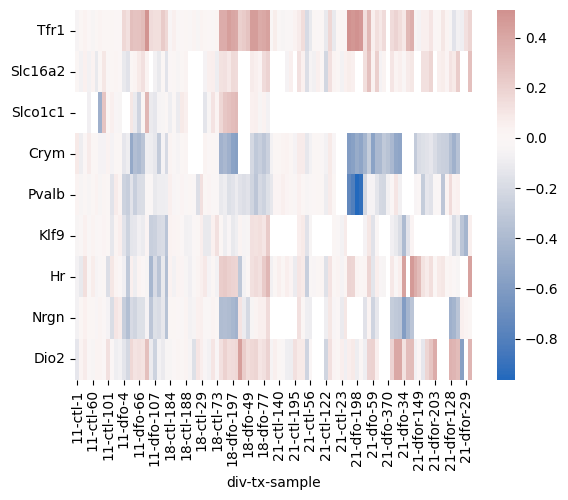

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

wide_data = (
    raw_data
    .set_index(['div','tx','sample'])
    .apply(np.log10)
)

sns.heatmap(wide_data.T, cmap='vlag', center=0)

## 11 DIV

C:\Users\Tim M\AppData\Local\Temp\ipykernel_9768\3948696307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))


Eigenvalues: [0.06479772 0.04142905 0.02187586 0.00961156 0.00524228 0.00409668
 0.00285996 0.00162983 0.00052238]
Explained variation per principal component: [0.42611765 0.27244248 0.14385832 0.06320679 0.03447389 0.02694024
 0.01880742 0.01071795 0.00343526]


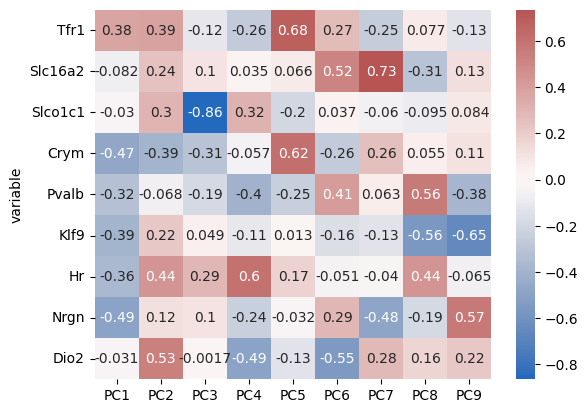

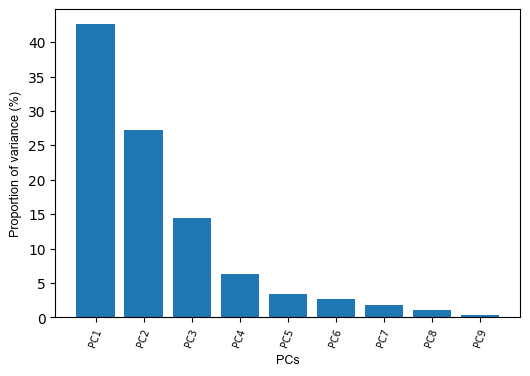

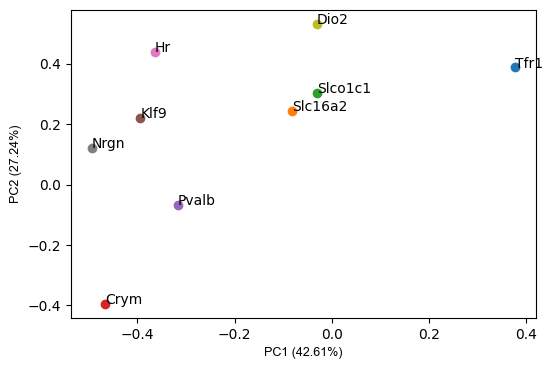

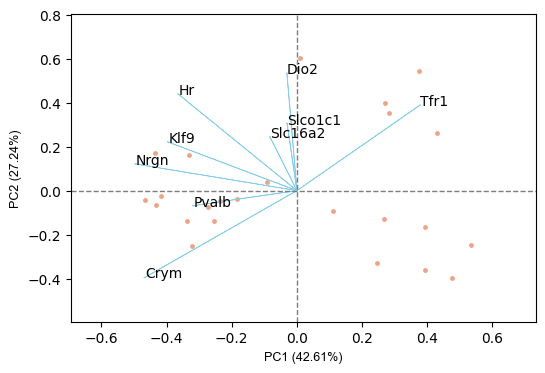

In [18]:
corr_idx = pd.IndexSlice[['11'],slice(None),slice(None)]
corr_data = wide_data.loc[corr_idx]

for var in corr_data.columns:
    corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))

ml_data = corr_data.values


# feature_cols = corr_data.columns
# X = corr_data.loc[:,feature_cols]
# imp = SimpleImputer(
#     missing_values=np.nan,
#     strategy='mean'
# )
# ml_data = imp.fit_transform(X)
# ml_data = corr_data

pca = PCA(n_components=None)
pca_result = pca.fit_transform(ml_data)
pca_result

print('Eigenvalues: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_data = corr_data.copy()
pca_data['pca-one'] = pca_result[:,0]
pca_data['pca-two'] = pca_result[:,1] 
pca_data['pca-three'] = pca_result[:,2]

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1

loadings = pca.components_
pc_list=["PC"+str(i) for i in list(range(1, pca.n_features_in_+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable'] = corr_data.columns.values
loadings_df = loadings_df.set_index('variable')

# correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='vlag', center=0)

# Scree plot 
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],
    show=True,
    )

# 2D PCA Plot
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=corr_data.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

# 2D BiPlot PCA
cluster.biplot(
    cscore=pca_result, loadings=loadings, labels=corr_data.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

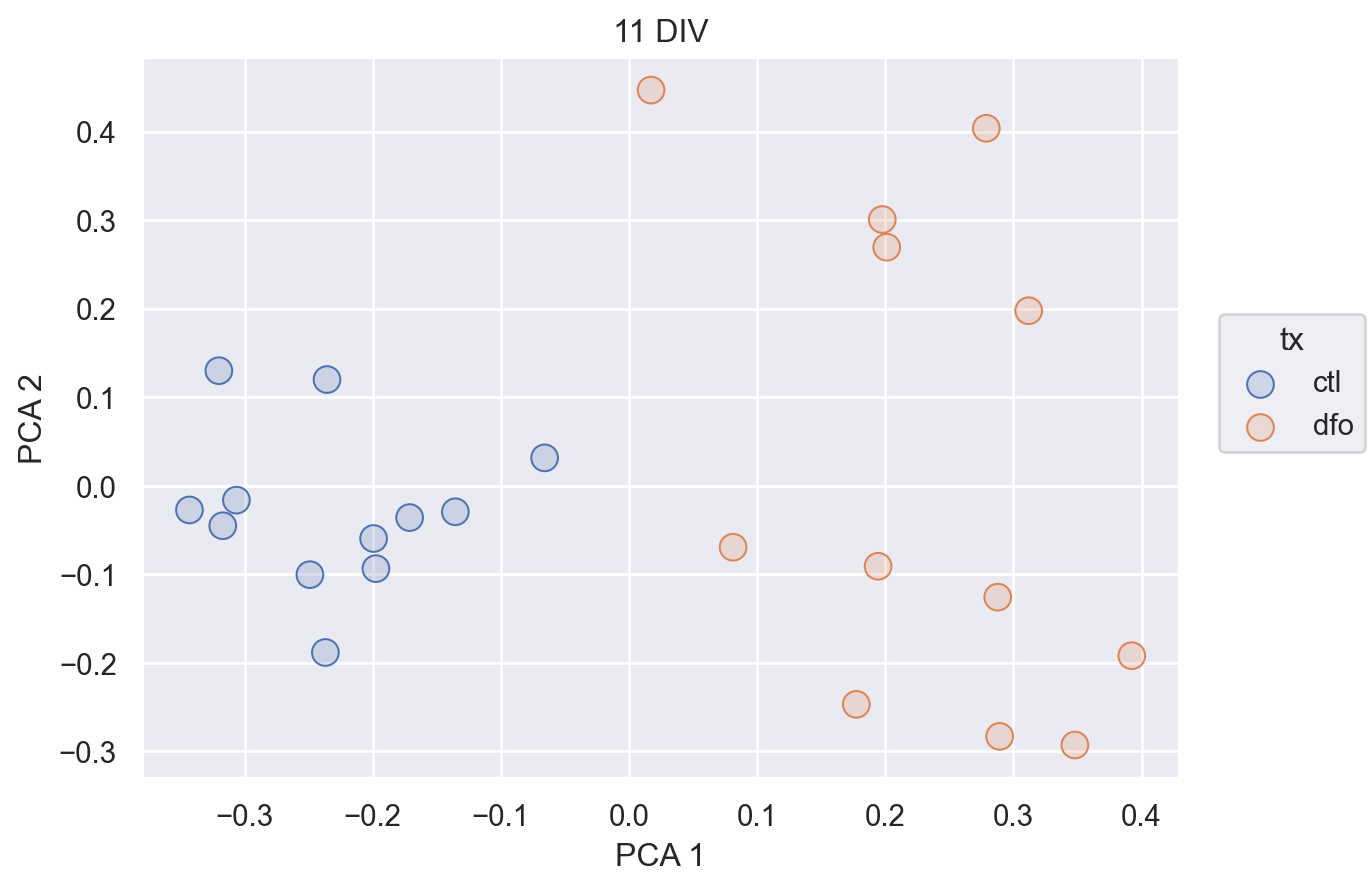

In [110]:
p = (
    so.Plot(
        data = pca_data, 
        x='pca-one', 
        y='pca-two', 
        color='tx',
    )
    .add(so.Dots(pointsize=10))
    .label(
        y="PCA 2",
        x="PCA 1",
        title='11 DIV',
    ) 
    .scale(color='colorblind')
)
p

## 18 DIV

C:\Users\Tim M\AppData\Local\Temp\ipykernel_9768\3738791331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))


Eigenvalues: [0.1213792  0.0338478  0.01878424 0.00455631 0.00319258 0.00263887
 0.00190485 0.00120632 0.00053964]
Explained variation per principal component: [0.64546299 0.17999382 0.09988971 0.02422928 0.0169773  0.01403284
 0.01012952 0.00641488 0.00286966]


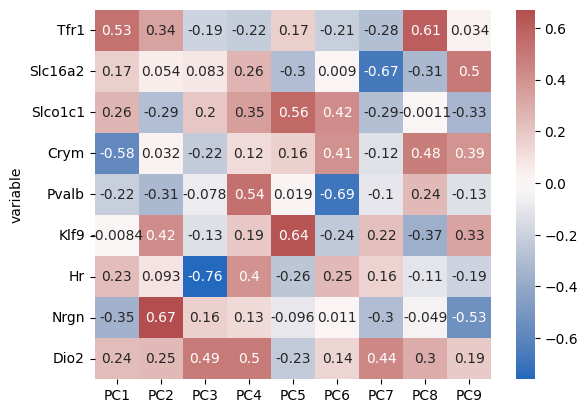

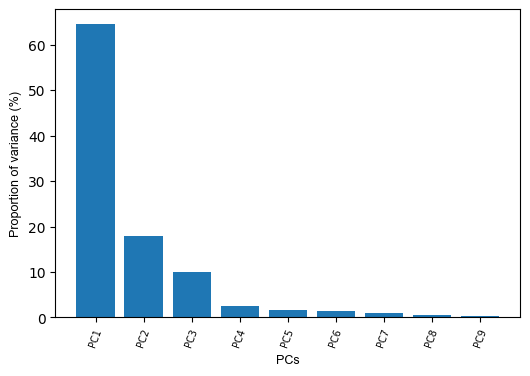

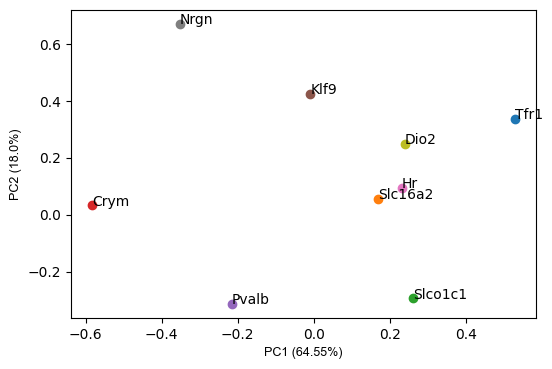

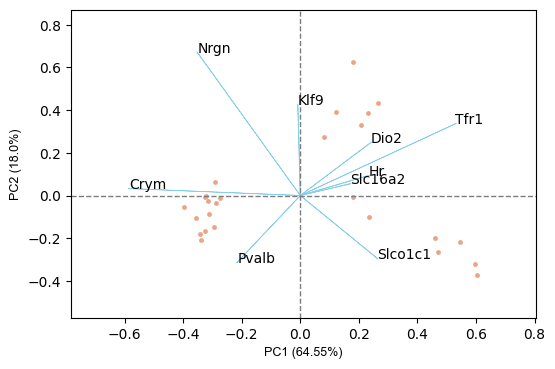

In [23]:
corr_idx = pd.IndexSlice[['18'],slice(None),slice(None)]
corr_data = wide_data.loc[corr_idx]

#imput with pandas groupby, probably not as efficient on large datasets, but that's not the point
for var in corr_data.columns:
    corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))

ml_data = corr_data.values

pca = PCA(n_components=None)
pca_result = pca.fit_transform(ml_data)
pca_result

print('Eigenvalues: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_data = corr_data.copy()
pca_data['pca-one'] = pca_result[:,0]
pca_data['pca-two'] = pca_result[:,1] 
pca_data['pca-three'] = pca_result[:,2]

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1

loadings = pca.components_
pc_list=["PC"+str(i) for i in list(range(1, pca.n_features_in_+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable'] = corr_data.columns.values
loadings_df = loadings_df.set_index('variable')

# correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='vlag', center=0)

# Scree plot 
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],
    show=True,
    )

# 2D PCA Plot
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=corr_data.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

# 2D BiPlot PCA
cluster.biplot(
    cscore=pca_result, loadings=loadings, labels=corr_data.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

Eigenvalues: [0.10787991 0.03468698 0.01629476 0.00575337 0.00413104 0.00295873
 0.0023381  0.00182299 0.00065546]
Explained variation per principal component: [0.61114373 0.19650304 0.09231043 0.03259306 0.02340248 0.01676129
 0.01324545 0.01032729 0.00371322]


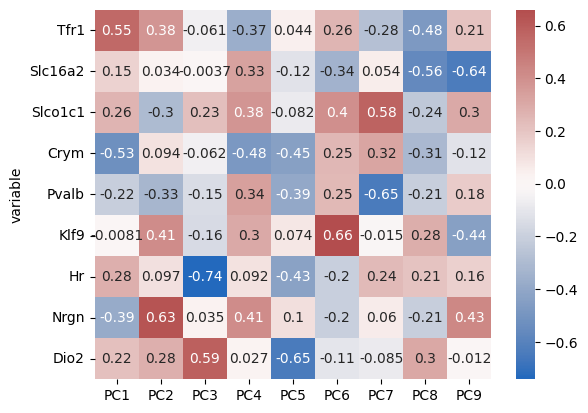

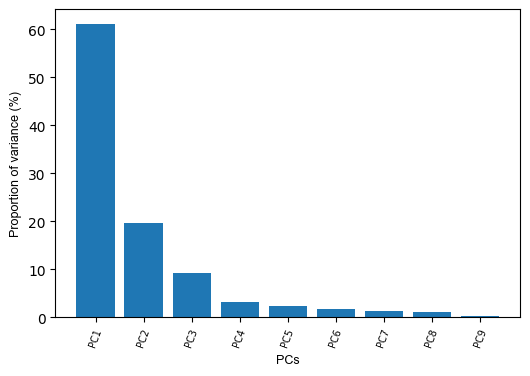

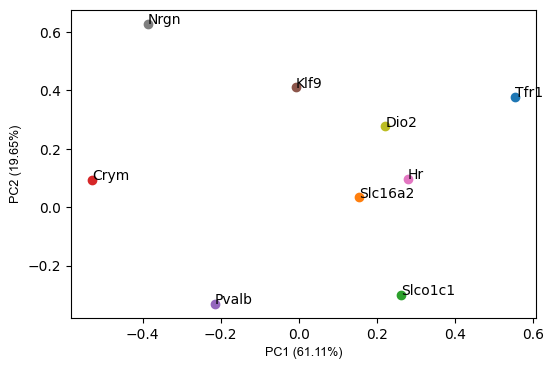

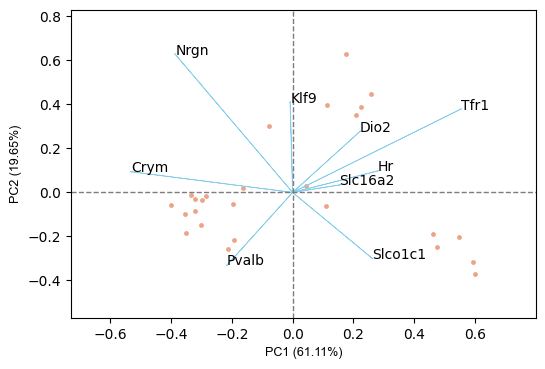

In [87]:
corr_idx = pd.IndexSlice[['18'],slice(None),slice(None)]
corr_data = wide_data.loc[corr_idx]

feature_cols = corr_data.columns
X = corr_data.loc[:,feature_cols]
imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean'
)
ml_data = imp.fit_transform(X)
# ml_data = corr_data

pca = PCA(n_components=None)
pca_result = pca.fit_transform(ml_data)
pca_result

print('Eigenvalues: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_data = X.copy()
pca_data['pca-one'] = pca_result[:,0]
pca_data['pca-two'] = pca_result[:,1] 
pca_data['pca-three'] = pca_result[:,2]

# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1

loadings = pca.components_
pc_list=["PC"+str(i) for i in list(range(1, pca.n_features_in_+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

# correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='vlag', center=0)

# Scree plot 
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],
    show=True,
    )

# 2D PCA Plot
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

# 2D BiPlot PCA
cluster.biplot(
    cscore=pca_result, loadings=loadings, labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True,
    )

In [89]:
# non imputed plots below

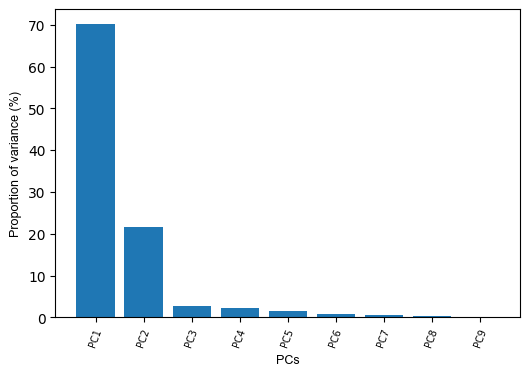

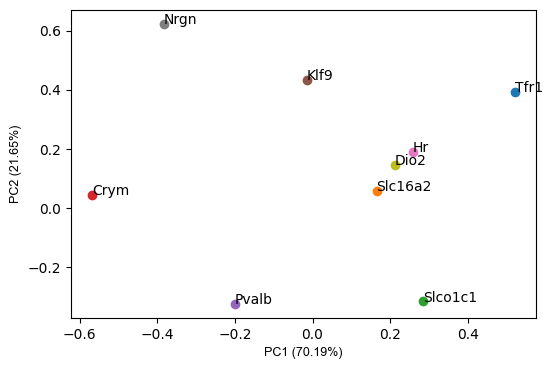

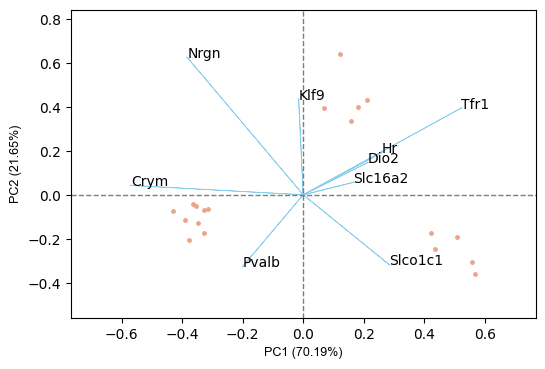

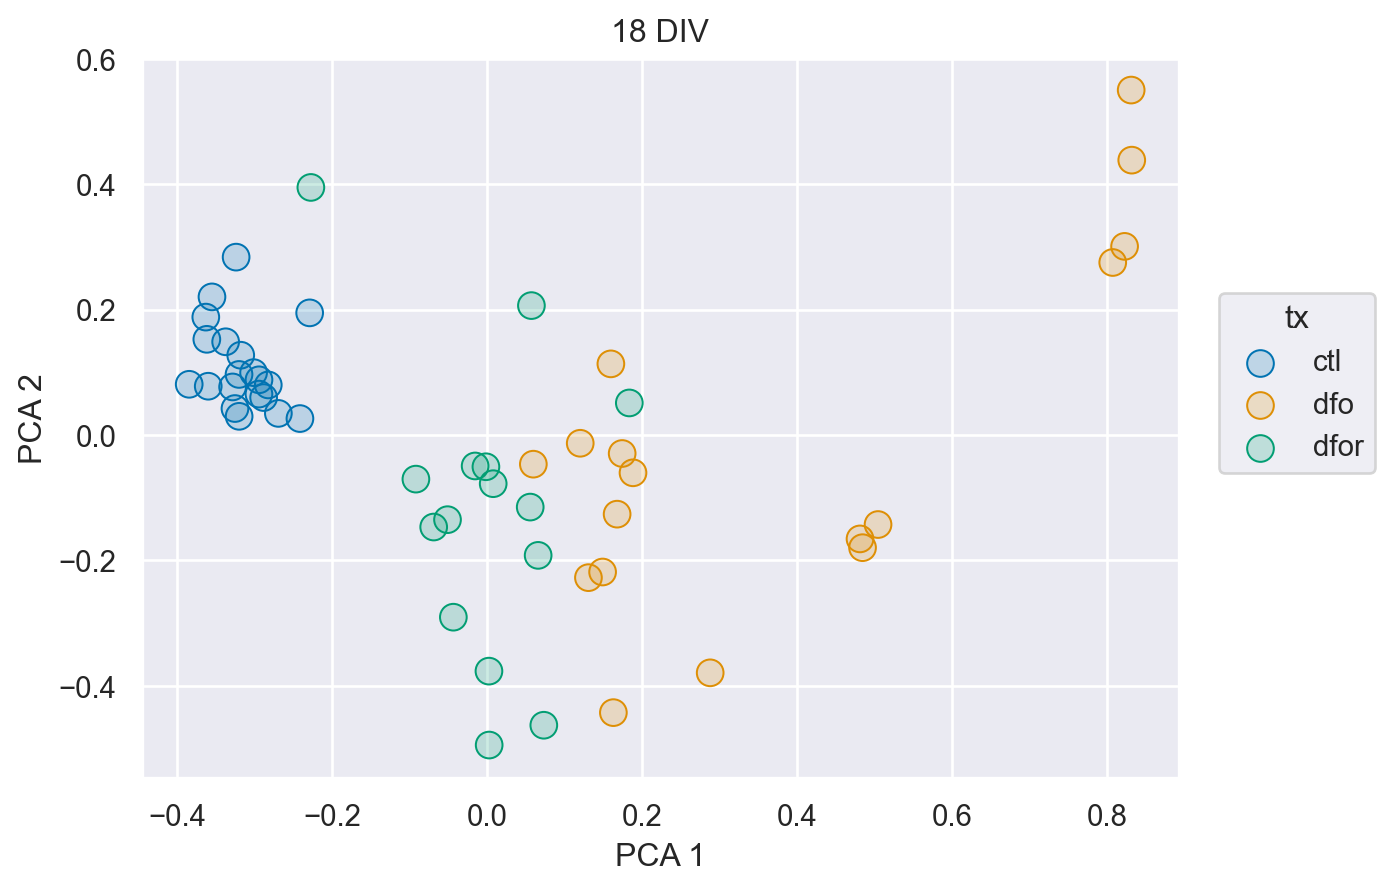

In [46]:
p = (
    so.Plot(
        data = pca_data, 
        x='pca-one', 
        y='pca-two', 
        color='tx',
    )
    .add(so.Dots(pointsize=10))
    .label(
        y="PCA 2",
        x="PCA 1",
        title='18 DIV',
    )
    .scale(color='colorblind')
)
p


## 21 DIV

<AxesSubplot: xlabel='div-tx-sample'>

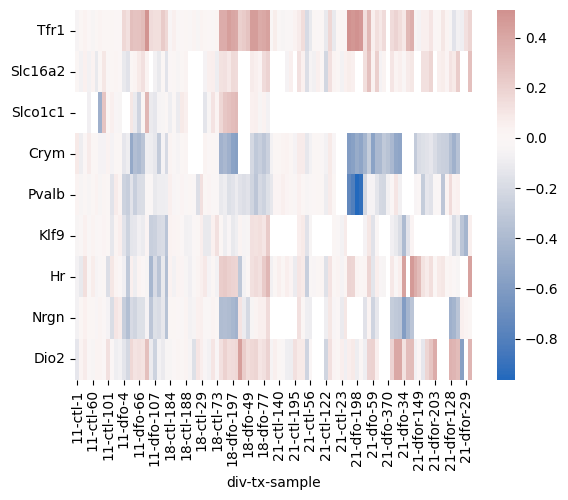

In [24]:
wide_data = (
    raw_data
    .set_index(['div','tx','sample'])
    .apply(np.log10)
)

sns.heatmap(wide_data.T, cmap='vlag', center=0)

In [47]:
corr_idx = pd.IndexSlice[['21'],slice(None),slice(None)]
corr_data = (
    wide_data
    .loc[corr_idx]
    .drop('Slco1c1', axis=1)
)
feature_cols = corr_data.columns
X = corr_data.loc[:,feature_cols]
X.shape # I think X is supposed to be the values, but this containes the index as well

y = corr_data.reset_index().tx
y.shape

(52,)

In [48]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
ml_data = imp.fit_transform(X)
ml_data

array([[-1.52948318e-02,  5.50059585e-02, -6.09684654e-02,
        -1.26586149e-01, -6.28793695e-02, -7.27318324e-02,
        -9.99348065e-02, -5.18757224e-02],
       [ 6.77083661e-02,  5.50059585e-02,  1.18876135e-02,
         2.36511960e-02, -6.28793695e-02,  8.43508251e-03,
        -9.99348065e-02,  5.28416723e-02],
       [-1.45280149e-02,  5.50059585e-02,  7.14809366e-03,
         2.66029924e-02, -6.28793695e-02,  5.17920281e-02,
        -9.99348065e-02,  6.13887177e-03],
       [-4.63422204e-02,  5.50059585e-02,  3.60820419e-02,
         5.44980861e-02, -6.28793695e-02,  3.42990250e-03,
        -9.99348065e-02, -1.36895233e-02],
       [-1.45558116e-02, -5.64690361e-02,  3.89245870e-02,
         2.34025403e-02, -6.28793695e-02,  6.14999330e-02,
        -9.99348065e-02, -8.55295424e-02],
       [-2.79715678e-02,  4.99643331e-02,  1.16527209e-02,
         1.73555207e-03, -6.28793695e-02,  2.32085632e-02,
        -9.99348065e-02, -9.06356666e-02],
       [ 3.95478248e-02,  5.500595

Eigenvalues: [0.11077246 0.05214377 0.02716853 0.01757709 0.00815119 0.00665567
 0.00396688 0.00213296]
Explained variation per principal component: [0.48463566 0.22813188 0.11886381 0.07690073 0.0356619  0.02911891
 0.01735532 0.0093318 ]


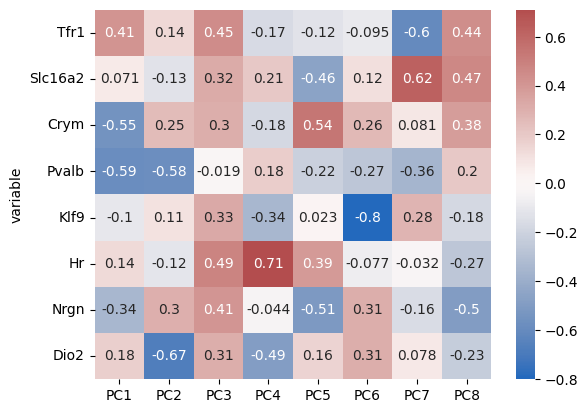

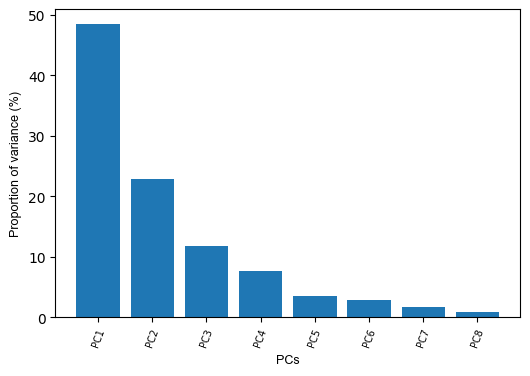

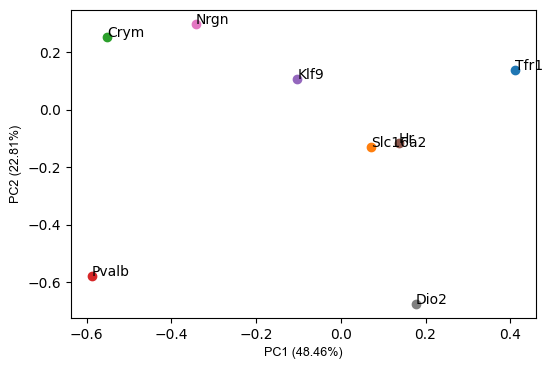

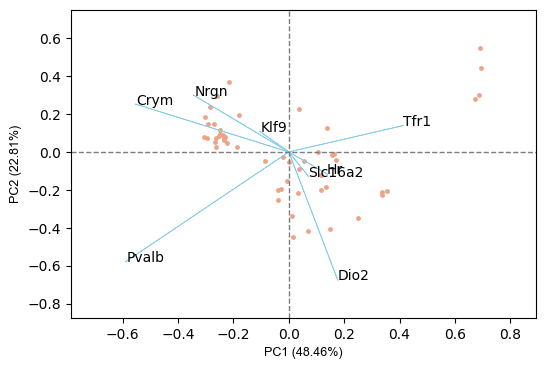

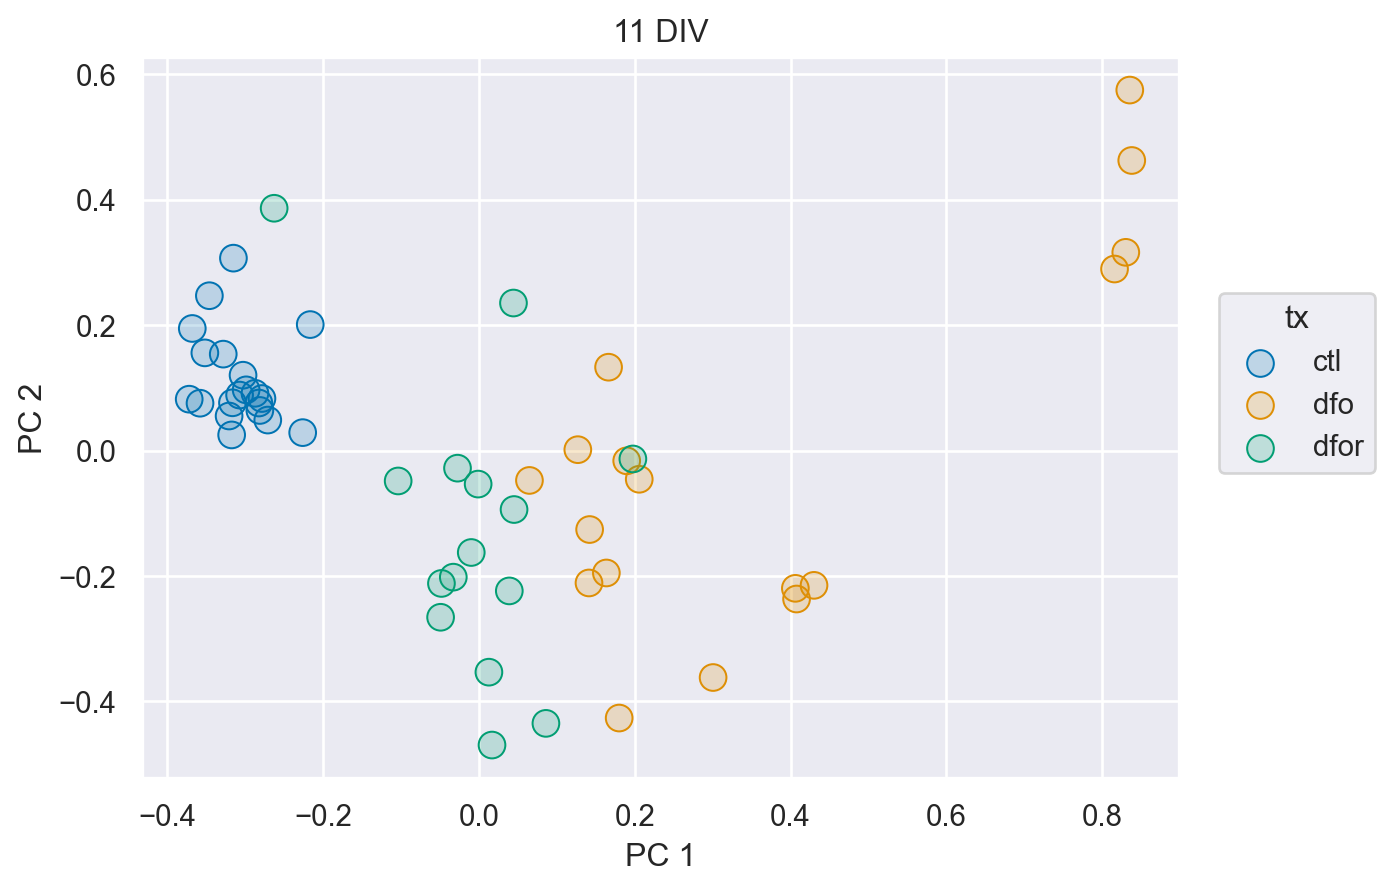

In [51]:
corr_idx = pd.IndexSlice[['21'],slice(None),slice(None)]
corr_data = wide_data.loc[corr_idx].drop('Slco1c1', axis=1)

for var in corr_data.columns:
    corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))

ml_data = corr_data.values


pca = PCA(n_components=None)
pca_result = pca.fit_transform(ml_data)

print('Eigenvalues: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_data = corr_data.copy()
pca_data['pca-one'] = pca_result[:,0]
pca_data['pca-two'] = pca_result[:,1] 
pca_data['pca-three'] = pca_result[:,2]

loadings = pca.components_
pc_list=["PC"+str(i) for i in list(range(1, pca.n_features_in_+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

# correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='vlag', center=0)

# Scree plot 
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],
    show = True,
    )

# 2D PCA Plot
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True
    )

# 2D BiPlot PCA
cluster.biplot(
    cscore=pca_result, loadings=loadings, labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True
    )

p = (
    so.Plot(
        data = pca_data, 
        x='pca-one', 
        y='pca-two', 
        color='tx',
    )
    .add(so.Dots(pointsize=10))
    .label(
        y="PC 2",
        x="PC 1",
        title='11 DIV',
    )
    .scale(color='colorblind')
)
p


Eigenvalues: [0.15335388 0.04525509 0.02688909 0.01171804 0.00553657 0.00195299
 0.00137703 0.00091033]
Explained variation per principal component: [0.62088345 0.18322415 0.10886579 0.04744281 0.02241589 0.00790707
 0.00557517 0.00368567]


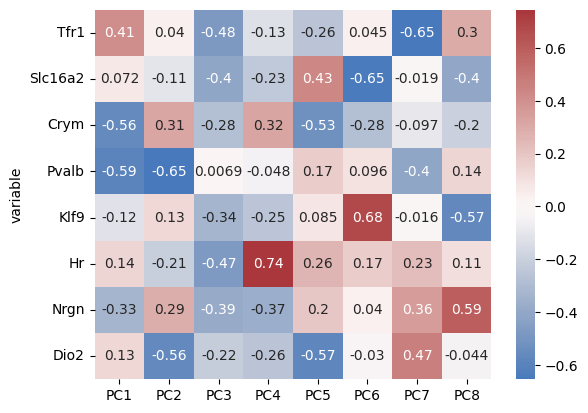

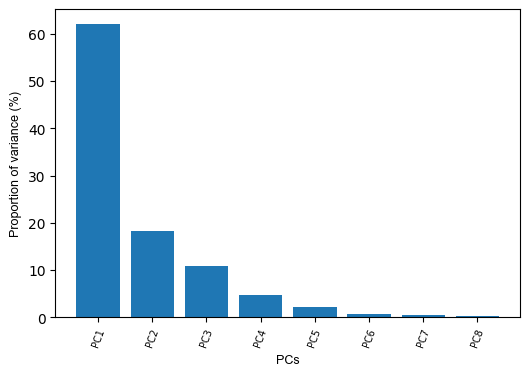

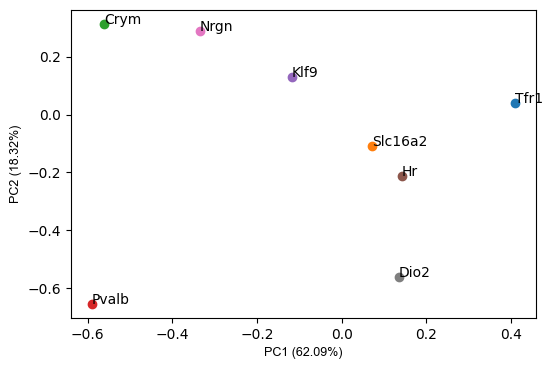

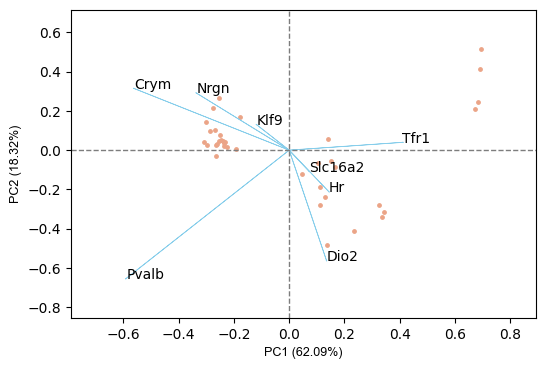

In [52]:
corr_idx = pd.IndexSlice[['21'],['ctl','dfo'],slice(None)]
corr_data = wide_data.loc[corr_idx].drop('Slco1c1', axis=1)

for var in corr_data.columns:
    corr_data[var] = corr_data[var].fillna(corr_data.groupby('tx')[var].transform('median'))

ml_data = corr_data.values


pca = PCA(n_components=None)
pca_result = pca.fit_transform(ml_data)

print('Eigenvalues: {}'.format(pca.explained_variance_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# pca_data = X.copy()
# pca_data['pca-one'] = pca_result[:,0]
# pca_data['pca-two'] = pca_result[:,1] 
# pca_data['pca-three'] = pca_result[:,2]

loadings = pca.components_
pc_list=["PC"+str(i) for i in list(range(1, pca.n_features_in_+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

# correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='vlag', center=0)

# Scree plot 
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],
    show = True,
    )

# 2D PCA Plot
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True
    )

# 2D BiPlot PCA
cluster.biplot(
    cscore=pca_result, loadings=loadings, labels=X.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),
    show=True
    )


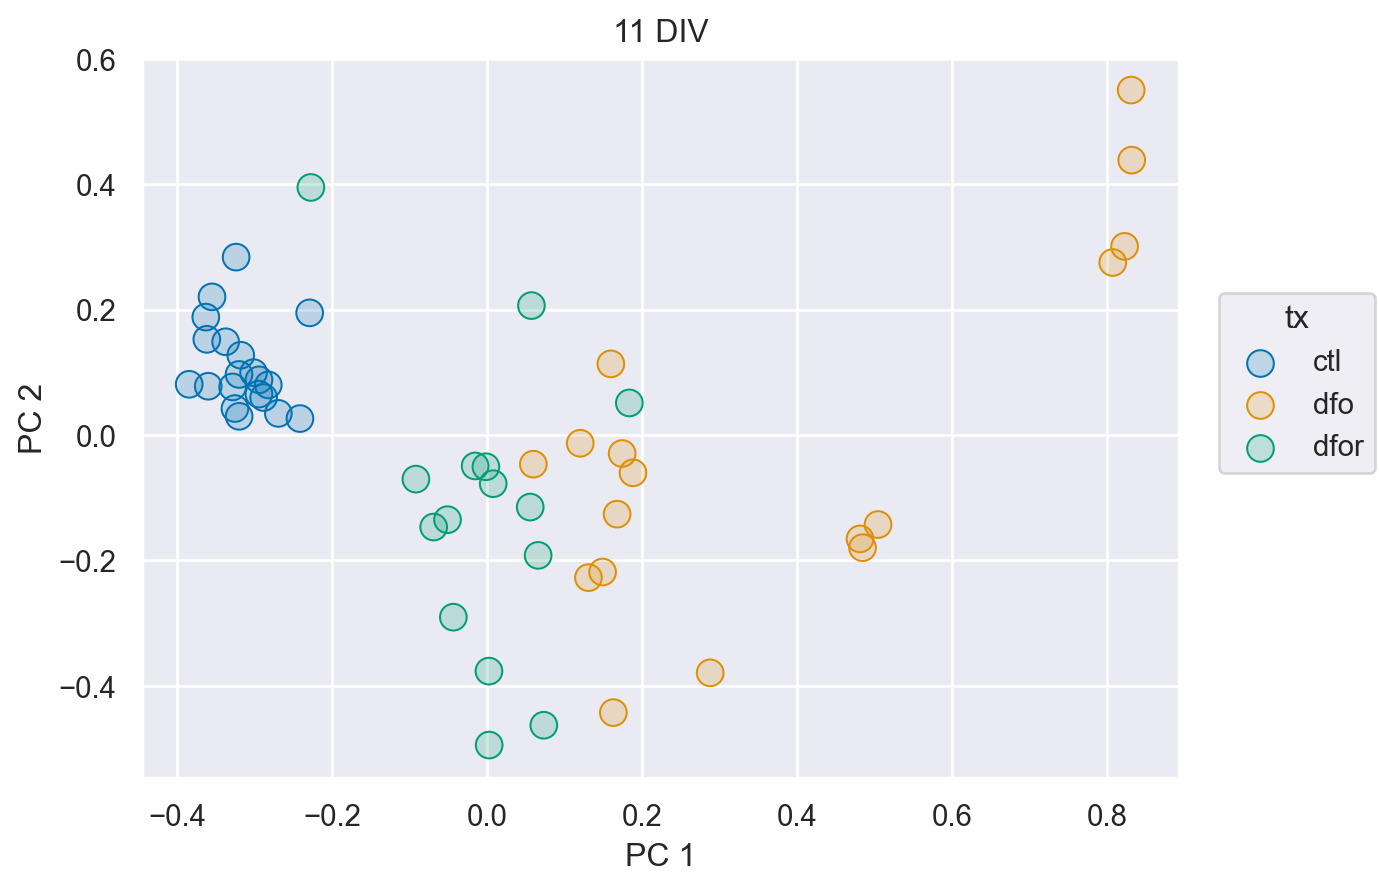

In [45]:
p = (
    so.Plot(
        data = pca_data, 
        x='pca-one', 
        y='pca-two', 
        color='tx',
    )
    .add(so.Dots(pointsize=10))
    .label(
        y="PC 2",
        x="PC 1",
        title='11 DIV',
    )
    .scale(color='colorblind')
)
p


# Plotting Univariate Statistics with Seaborn

In [40]:
# Set Theme
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

sns.set_theme(
    style='ticks', 
    context='poster', 
    palette='colorblind', 
    font_scale=1)

In [41]:
# Plotting using a generalizable function, not sure if I like this though
# will require using indexing() to grab proper data
def mRNA_plot(
        width=None,   
        height=None,
        data=indexing(data),
        x_var='gene', 
        y_var='mrna', 
        hue_var='tx', 
        title=None, 
        box_cmap='pastel', 
        swarm_cmap='colorblind'
        ):
    
    plot_data = data.reset_index()

    f, ax = plt.subplots(figsize = (width, height))

    sns.boxplot(data=plot_data, 
                x=x_var, 
                y=y_var,
                hue=hue_var,
                palette=box_cmap)

    sns.swarmplot(data=plot_data,
                  x=x_var, 
                  y=y_var, 
                  hue=hue_var, 
                  dodge=True, 
                  size=8, 
                  palette=swarm_cmap)
    
    key_length = data.reset_index().tx.unique().__len__()
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles[:key_length], 
              labels[:key_length], 
              title = "Treatment", 
              bbox_to_anchor=(1,0.5), 
              loc='center left')
    
    ax.set_xlabel('Gene')
    ax.set_ylabel('Relative mRNA')
    ax.set_title(title)
    ax.semilogy(base=10,subs=None)
    # ax.set_yscale('log')
    # #ax.set_yticks([0.5,1,2])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter()) # https://stackoverflow.com/questions/14530113/set-ticks-with-logarithmic-scale
    # #ax.get_xaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
    from matplotlib.ticker import ScalarFormatter, NullFormatter
    for axis in [ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
        axis.set_minor_formatter(ScalarFormatter())
    sns.despine()


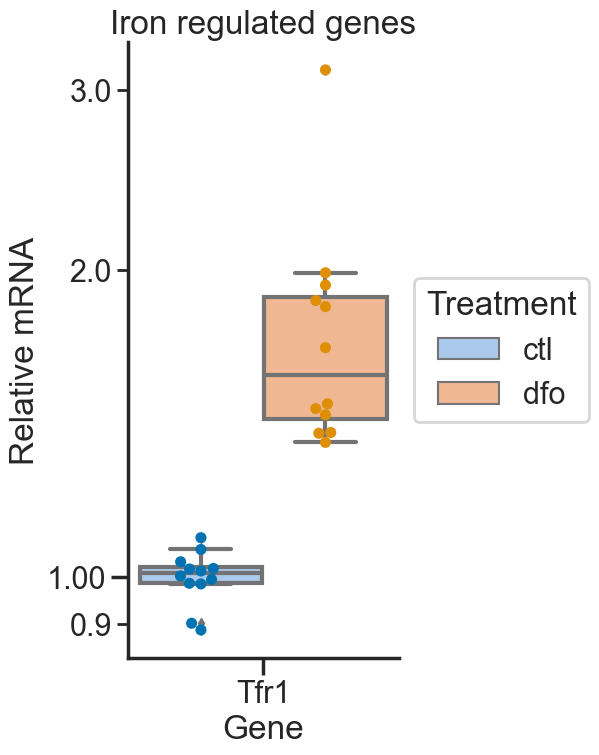

In [42]:
mRNA_plot(width=3.5, 
          height=8, 
          data=indexing(data,['11'],slice(None),slice(None),['Tfr1']),
          title='Iron regulated genes',
          )

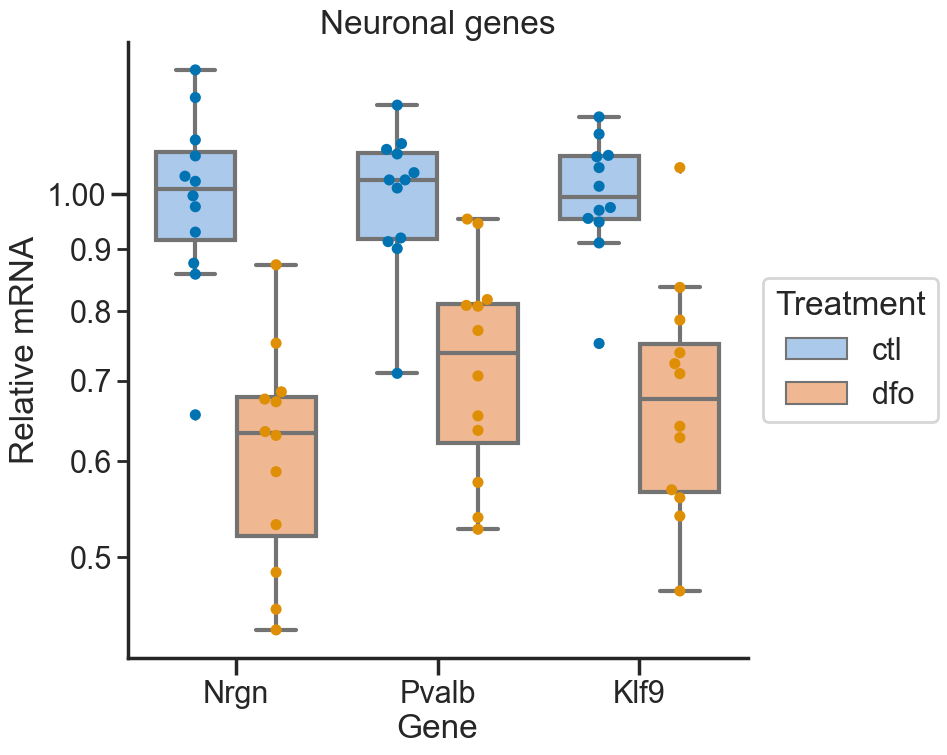

In [322]:
mRNA_plot(width=8, 
          height=8, 
          data=indexing(data,['11'],slice(None),slice(None),['Nrgn','Pvalb','Klf9']),
          title='Neuronal genes',
          )

In [326]:
import seaborn.objects as so


NameError: name 'penguins' is not defined

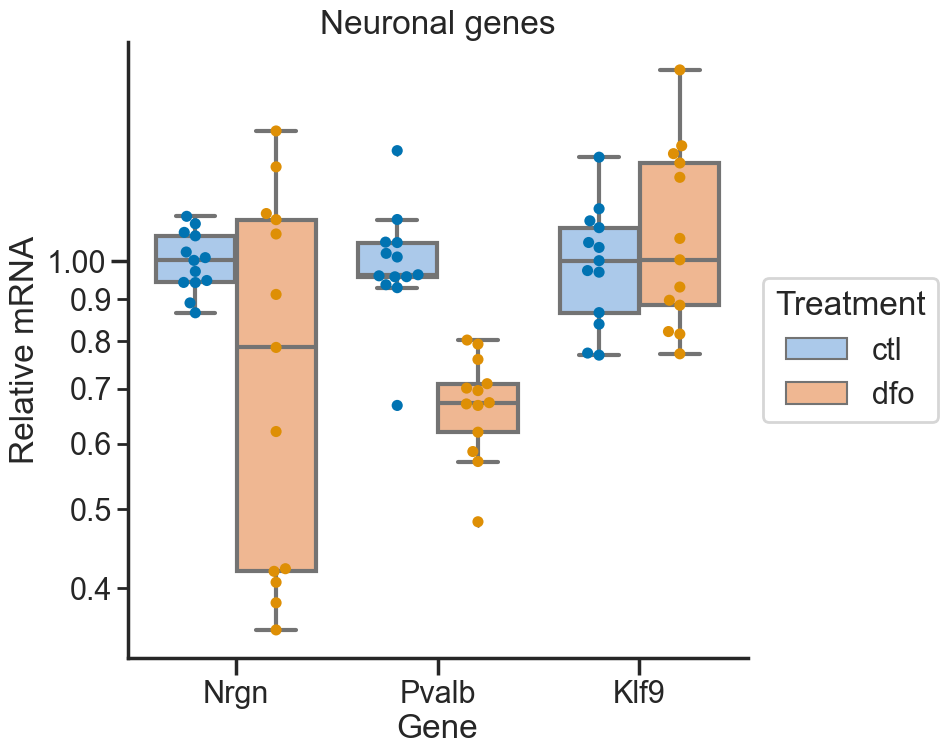

In [323]:
mRNA_plot(width=8, 
          height=8, 
          data=indexing(data,['18'],slice(None),slice(None),['Nrgn','Pvalb','Klf9']),
          title='Neuronal genes',
          ).add()

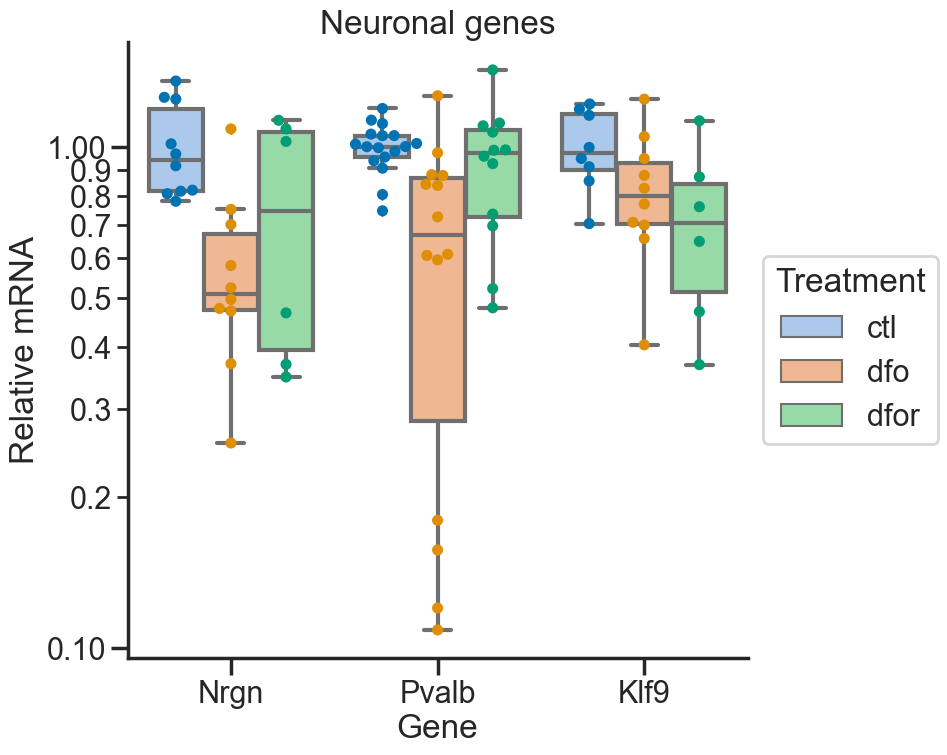

In [324]:
mRNA_plot(width=8, 
          height=8, 
          data=indexing(data,['21'],slice(None),slice(None),['Nrgn','Pvalb','Klf9']),
          title='Neuronal genes',
          )

In [8]:
gene_list = ['Tfr1', 'Crym']

plot_data = (data
             .loc[gene_list]
             .reset_index()
             )

sns.catplot(data = plot_data,
            x = 'div',
            y='mrna',
            hue='tx',
            col='gene',
            col_wrap=3,
            kind='box',
            palette='pastel',
            )

plt.yscale('log')
tick_list = [0.1,0.2,0.3,0.5,1.0,2.0,3.0]
plt.yticks(ticks=tick_list, labels=tick_list)

KeyError: "['Tfr1' 'Crym'] not in index"

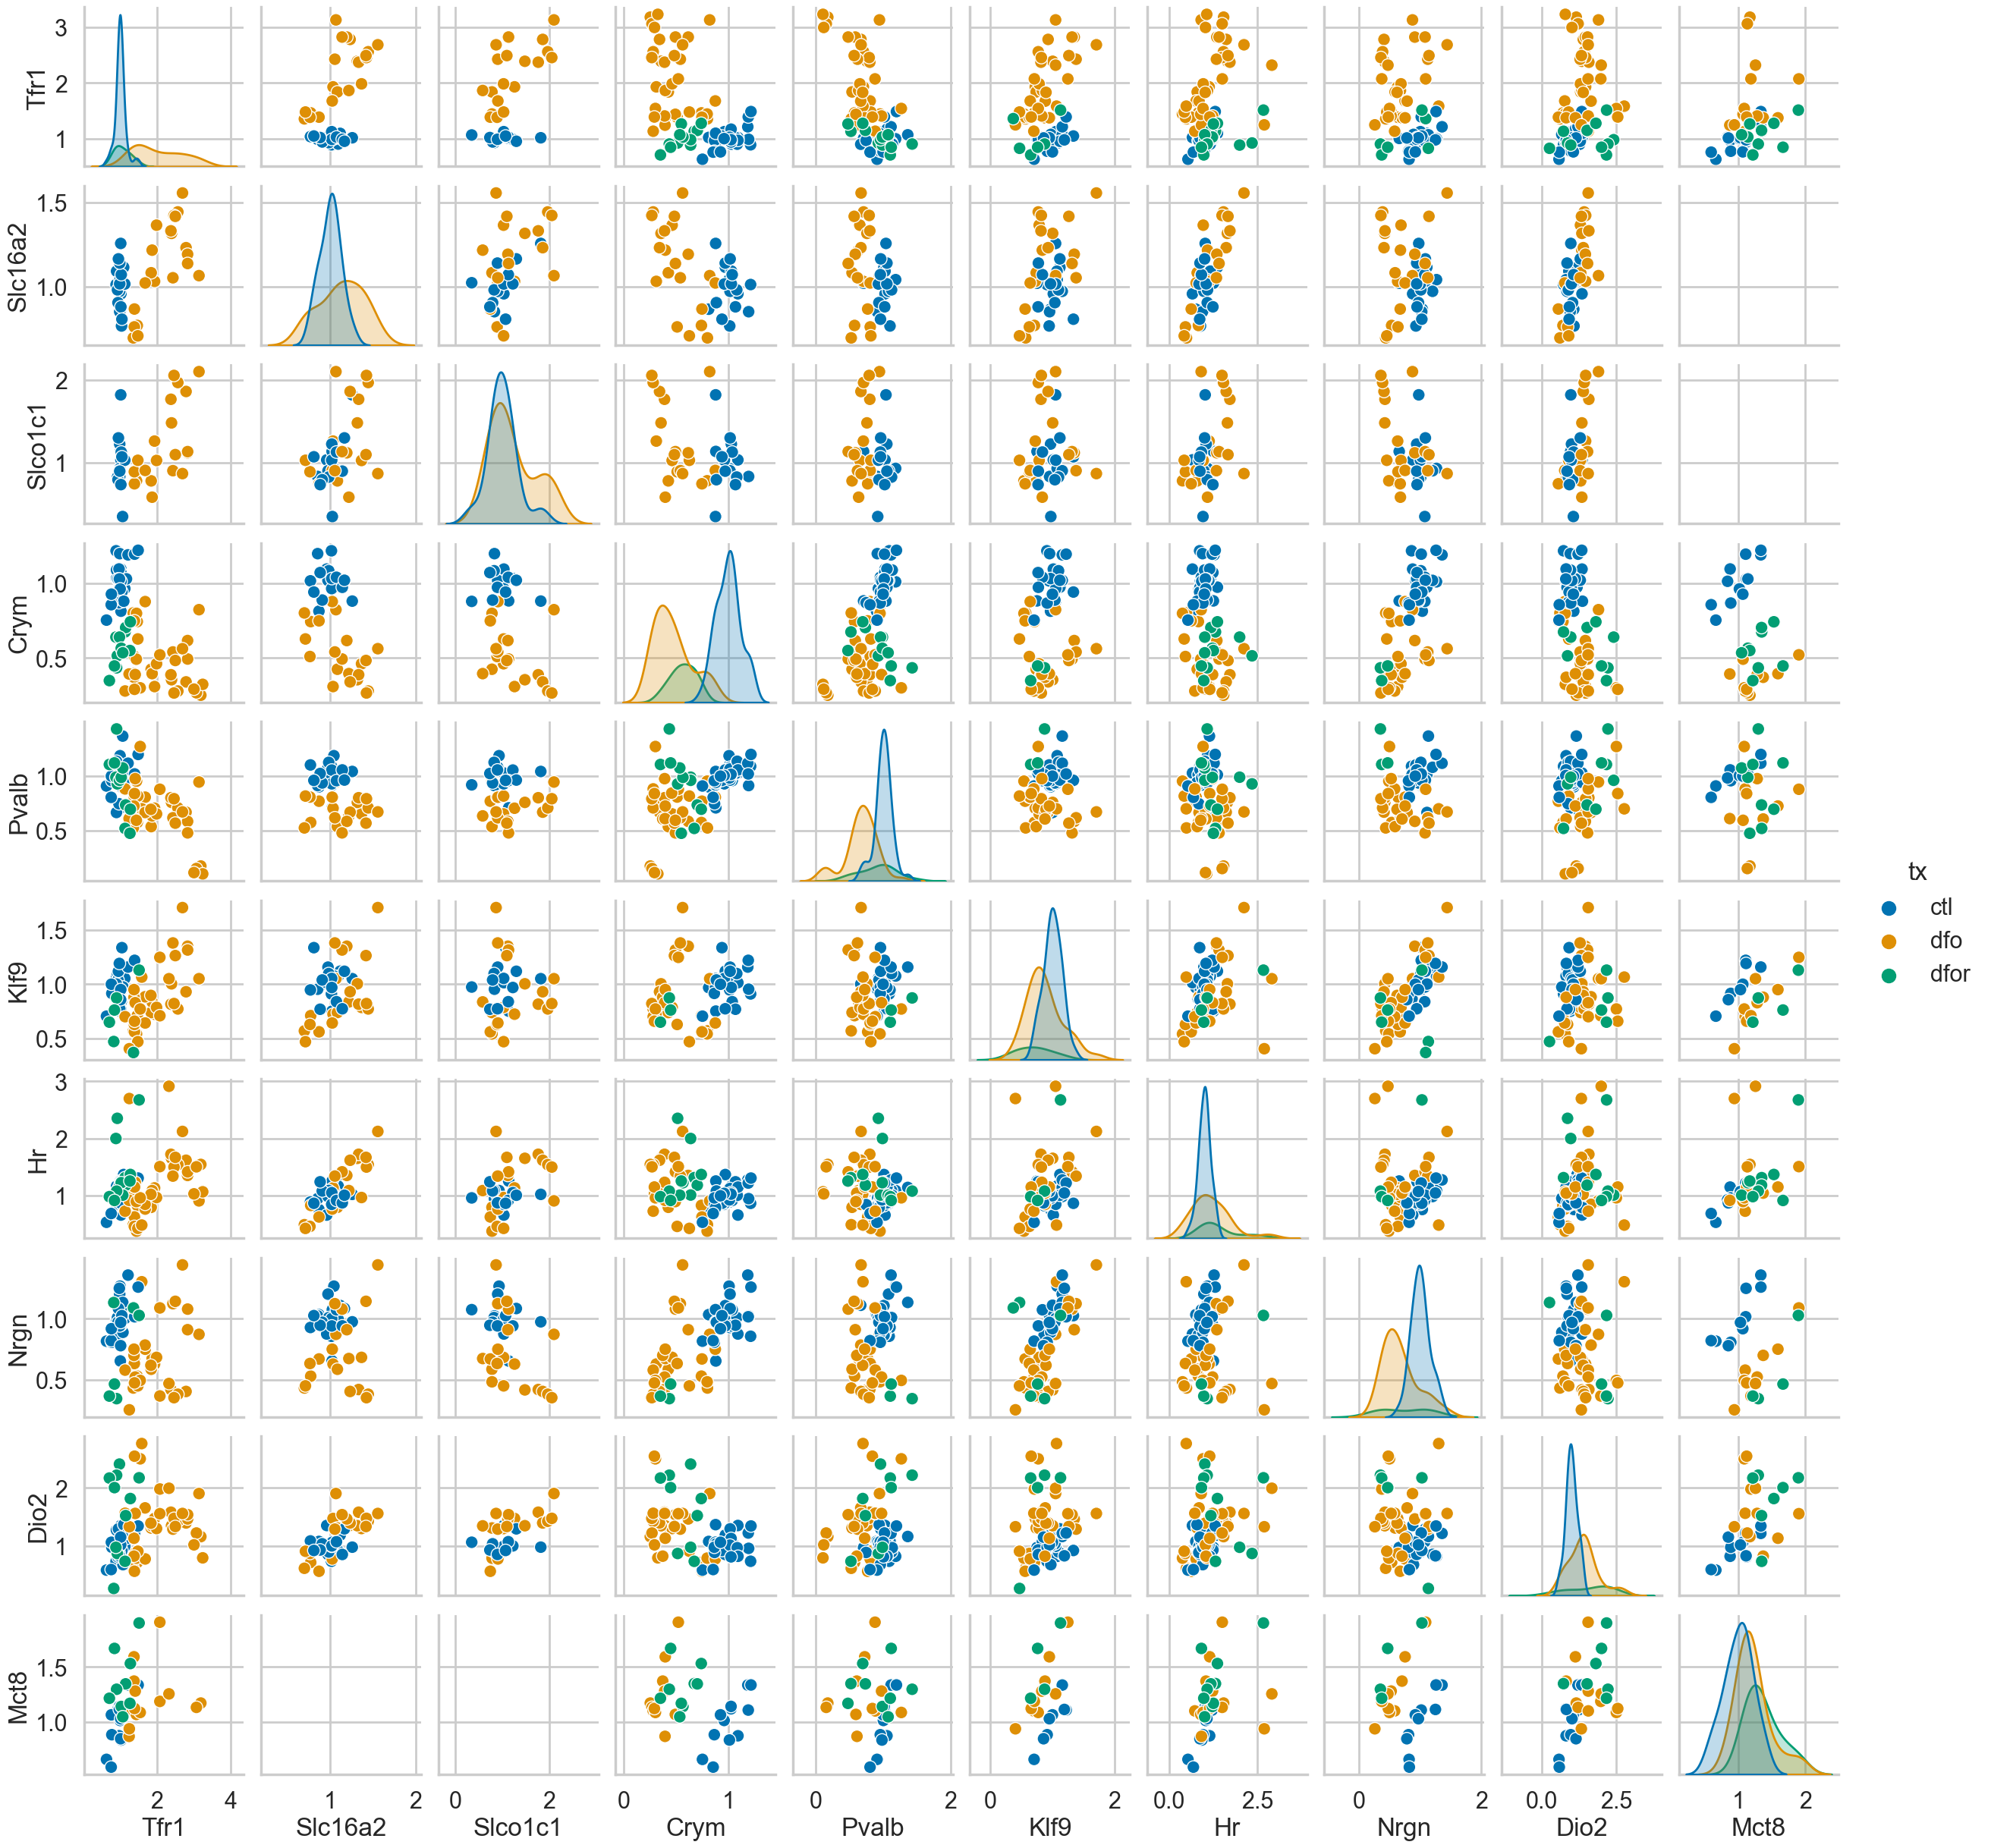

In [ ]:
sns.pairplot(data=raw_data,
             hue='tx',
             dropna=True
             )